<a href="https://colab.research.google.com/github/TAUforPython/BioMedAI/blob/main/EEG_Fuzzy_Hurst_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Система обработки данных ЭЭГ на основе нечетких алгоритмов

In [ ]:
!pip install mne
!pip install scipy
!pip install seaborn
!pip install MFDFA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.0 MB/s eta 0:00:00


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from scipy import signal
from math import sqrt
import mne

import seaborn as sns
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap

In [ ]:
pip install hurst


In [ ]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=f2841b6ed6f373499e7259806d5185d4f50750c628aa9973e189e16b860ac943
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Загрузка данных в среду

In [ ]:

edf_path = '/content/drive/MyDrive/EEG/EEG_EDF/EDF_example_FS_healthy.edf'

data_from_raw_edf = mne.io.read_raw_edf(edf_path, preload=True)

Extracting EDF parameters from /content/drive/MyDrive/EEG/EEG_EDF/EDF_example_FS_healthy.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-8ef073bd2786>:5: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  data_from_raw_edf = mne.io.read_raw_edf(edf_path, preload=True)
<ipython-input-6-8ef073bd2786>:5: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  data_from_raw_edf = mne.io.read_raw_edf(edf_path, preload=True)


Reading 0 ... 28799  =      0.000 ...   224.992 secs...


In [ ]:

edf_path ='/content/drive//My Drive/EEG/EEG_data/Задание 1 (открыть и закрыть левый или правый кулак)/'
# name = 'S001R03.edf'
# name = 'S002R03.edf'
# name = 'S003R03.edf'
# name = 'S004R03.edf'
# name = 'S005R03.edf'
# name = 'S006R03.edf'
# name = 'S007R03.edf'
# name = 'S008R03.edf'
# name = 'S009R03.edf'
# name = 'S010R03.edf'
# name = 'S012R03.edf'
# name = 'S013R03.edf'
# name = 'S014R03.edf'
# name = 'S015R03.edf'
# name = 'S011R03.edf'
# name = 'S016R03.edf'
# name = 'S017R03.edf'
# name = 'S018R03.edf'
# name = 'S019R03.edf'
# name = 'S020R03.edf'
# name = 'S021R03.edf'
# name = 'S022R03.edf'
# name = 'S023R03.edf'
# name = 'S024R03.edf'
# name = 'S025R03.edf'
# name = 'S026R03.edf'
# name = 'S027R03.edf'
# name = 'S028R03.edf'
# name = 'S029R03.edf'
# name = 'S030R03.edf'
# name = 'S031R03.edf'
# name = 'S032R03.edf'
# name = 'S033R03.edf'
# name = 'S034R03.edf'
# name = 'S035R03.edf'
# name = 'S036R03.edf'
# name = 'S037R03.edf'
# name = 'S038R03.edf'
# name = 'S039R03.edf'
name = 'S040R03.edf'

# загрузка файла (данные в структуре переданы в переменную)
data_from_raw_edf = mne.io.read_raw_edf(edf_path+name, preload=True)

# stim_channel='ID') #stim_channel название канала, в котором содержатся метки событий, если нам это известно


Extracting EDF parameters from /content/drive/My Drive/EEG/EEG_data/Задание 1 (открыть и закрыть левый или правый кулак)/S040R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


In [ ]:
# тестовые данные

edf_path ='/content/drive/My Drive/EEG/EEG_data/тестовые данные/' #Здесь указываем путь до папки в которой нахожится файл
# name = 'S041R03.edf'
# name = 'S042R03.edf'
# name = 'S043R03.edf'
# name = 'S044R03.edf'
# name = 'S045R03.edf'
# name = 'S046R03.edf'
# name = 'S047R03.edf'
# name = 'S048R03.edf'
# name = 'S049R03.edf'
name = 'S050R03.edf'


data_from_raw_edf = mne.io.read_raw_edf(edf_path+name, preload=True)

Extracting EDF parameters from /content/drive/My Drive/EEG/EEG_data/тестовые данные/S050R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


In [ ]:
data_from_raw_edf.filter(0.5, 49, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEDF | S040R03.edf, 64 x 19680 (123.0 s), ~9.7 MB, data loaded>

In [ ]:
eeg_data, eeg_times = data_from_raw_edf.get_data(return_times=True)
t_index_begin = 1500
t_index_end = 20000
t = eeg_times[t_index_begin:t_index_end]
T = t[-1]
N = len(t)
y = eeg_data[2, t_index_begin:t_index_end]

# функция генерации сигнала стохастического
# аддитивный белый гауссовский шум
def awgn(mu, noise_sigma, data_size, white_noise_power):
    t = np.arange(0, data_size, 1.)
    #random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size))

    for i in range(data_size):
        random.seed(int(t[i]))
        noise[i] = random.gauss(mu, noise_sigma)
        #noise[i] = random.uniform(0, 1)
        y[i] = white_noise_power * noise[i]

    return y
N = 60*5
T = 5.0
t = np.linspace(0, T, N)
fs = 1 / (t[1] - t[0]) #частота временного ряда

signal_pure = np.ones(len(t))
signal_with_noise = signal_pure + awgn(0, 0.5, len(t), 1)
np.random.shuffle(signal_with_noise)
y = signal_with_noise

def snr_white_noise(signal, mean_noise, target_snr_db):
    # Добавление шума с использованием целевого SNR
    sig_avg_watts = np.mean(signal**2)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    # Сгенерировать выборку белого шума
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(signal))
    # Зашумить исходный сигнал
    y_awgn = signal + noise_volts
    return y_awgn

SNR = 10
N = 60*5
T = 5.0
t = np.linspace(0, T, N)
fs = 1 / (t[1] - t[0]) #частота временного ряда
signal_pure = np.ones(len(t))
signal_with_noise = snr_white_noise(signal_pure, 0, SNR)
y = signal_with_noise

# фрактальный стохастический сигнал

from MFDFA import fgn
T = 200
delta_t = 0.1
theta = 0.3
sigma = 0.1
# Временной массив траектории
t = np.arange(0, T, delta_t)
fs = 1 / (t[1] - t[0]) #частота временного ряда

# Дробный гауссовский шум
H = 0.7
dB = (T ** H) * fgn(N = t.size, H = H)

# Инициализируем массив y
y = np.zeros([t.size])

# Интегрируем процесс
for i in range(1, t.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dB[i]


from hurst import compute_Hc
H, c, data = compute_Hc(y, kind='change', simplified=False)

print (H)
print("H={:.4f}, c={:.4f}".format(H,c))

0.780974714249834
H=0.7810, c=0.8571


<ipython-input-47-0e3bc4043b99>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = white_noise_power * noise[i]


In [ ]:
from hurst import compute_Hc
H, c, data = compute_Hc(y, kind='change', simplified=False)

print (H)
print("H={:.4f}, c={:.4f}".format(H,c))

0.9173240159149473
H=0.9173, c=0.5180


In [ ]:
# для обучающих данных

from MFDFA import MFDFA

import os
from statsmodels.tsa.stattools import acf

from hurst import compute_Hc

mean_data = np.mean(y)
std_data = np.std(y)

f, psd = signal.periodogram(y, fs)
mean_psd = np.mean(psd)

H, c, data = compute_Hc(y, kind='change', simplified=False)
hurst_data = H

index = 1
csv_file_path = "/content/drive/MyDrive/EEG/csv_28_04.csv"
if not os.path.exists(csv_file_path):
    with open(csv_file_path, 'w') as f:
        f.write("Математическое ожидание,Среднеквадратическое отклонение,Спектральная плотность,Экспонента Херста\n")

df = pd.DataFrame({
    'Математическое ожидание': mean_data,
    'Среднеквадратическое отклонение': std_data,
    'Спектральная плотность': mean_psd,
    'Экспонента Херста': hurst_data
}, index=[index])
index += 1
with open(csv_file_path, 'a') as f:
    df.to_csv(f, header=False, index=False)

print(f"Новые вычисленные значения добавлены в файл: {csv_file_path}")


Новые вычисленные значения добавлены в файл: /content/drive/MyDrive/EEG/csv_28_04.csv


In [ ]:
# для тестовых данных

from MFDFA import MFDFA

import os
from statsmodels.tsa.stattools import acf

from hurst import compute_Hc

mean_data = np.mean(y)
std_data = np.std(y)

f, psd = signal.periodogram(y, fs)
mean_psd = np.mean(psd)
H, c, data = compute_Hc(y, kind='change', simplified=False)
hurst_data = H

index = 1

csv_file_path = "/content/drive/MyDrive/EEG/test_data.csv"

if not os.path.exists(csv_file_path):
    with open(csv_file_path, 'w') as f:
        f.write("Математическое ожидание,Среднеквадратическое отклонение,Спектральная плотность,Экспонента Херста\n")

df = pd.DataFrame({
    'Математическое ожидание': mean_data,
    'Среднеквадратическое отклонение': std_data,
    'Спектральная плотность': mean_psd,
    'Экспонента Херста': hurst_data
}, index=[index])
index += 1

with open(csv_file_path, 'a') as f:
    df.to_csv(f, header=False, index=False)

print(f"Новые вычисленные значения добавлены в файл: {csv_file_path}")

Новые вычисленные значения добавлены в файл: /content/drive/MyDrive/EEG/test_data.csv


In [ ]:
import pandas as pd
import os

df_ratio_type = pd.read_csv("/content/drive/MyDrive/EEG/ratio_type.csv")

csv_file_path = "/content/drive/MyDrive/EEG/csv_28_04.csv"
if os.path.exists(csv_file_path):
    df_csv_28_04 = pd.read_csv(csv_file_path)
else:
    df_csv_28_04 = pd.DataFrame(columns=['Математическое ожидание', 'Среднеквадратическое отклонение', 'Спектральная плотность', 'Экспонента Херста'])

df_csv_28_04['Type'] = df_ratio_type['Type']

csv_file_path = "/content/drive/MyDrive/EEG/csv_28_04.csv"

df_csv_28_04.to_csv(csv_file_path, index=False)

print(f"Данные из файла ratio_type.csv добавлены в файл csv_28_04.csv: {csv_file_path}")


Данные из файла ratio_type.csv добавлены в файл csv_28_04.csv: /content/drive/MyDrive/EEG/csv_28_04.csv


In [ ]:
# весь список каналов

# name = 'S001R03.edf'
# name = 'S002R03.edf'
# name = 'S003R03.edf'
# name = 'S004R03.edf'
# name = 'S005R03.edf'
# name = 'S006R03.edf'
# name = 'S007R03.edf'
# name = 'S008R03.edf'
# name = 'S009R03.edf'
# name = 'S010R03.edf'
# name = 'S012R03.edf'
# name = 'S013R03.edf'
# name = 'S014R03.edf'
# name = 'S015R03.edf'
# name = 'S011R03.edf'
# name = 'S016R03.edf'
# name = 'S017R03.edf'
# name = 'S018R03.edf'
# name = 'S019R03.edf'
# name = 'S020R03.edf'
# name = 'S021R03.edf'
# name = 'S022R03.edf'
# name = 'S023R03.edf'
# name = 'S024R03.edf'
# name = 'S025R03.edf'
# name = 'S026R03.edf'
# name = 'S027R03.edf'
# name = 'S028R03.edf'
# name = 'S029R03.edf'
# name = 'S030R03.edf'
# name = 'S031R03.edf'
# name = 'S032R03.edf'
# name = 'S033R03.edf'
# name = 'S034R03.edf'
# name = 'S035R03.edf'
# name = 'S036R03.edf'
# name = 'S037R03.edf'
# name = 'S038R03.edf'
# name = 'S039R03.edf'
# name = 'S040R03.edf'

#Определение уровня внимания

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (6.602 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
225 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 225 events and 128 original time points ...
0 bad epochs dropped


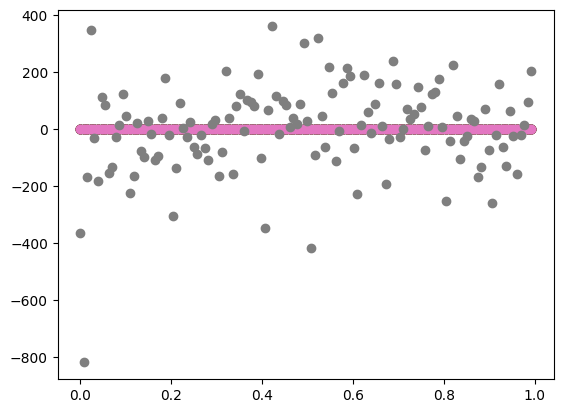

In [ ]:
# Подготовка данных
# фильтрация данных между 0.5 и 40 Гц
data_from_raw_edf.filter(0.5, 40, fir_design='firwin')

# Выделение интересующих каналов
eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])

# анализ для определения 3 видов селективного внимания

# выделение временных отрезков с повышенной амплитудой
epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)

# Проверка, что есть хотя бы одна эпоха после фильтрации
if len(epochs) > 0:
    evoked = epochs.average()
    times = evoked.times
    data = evoked.data

    #  определение трех пиков амплитуды
    peaks = np.argmax(np.abs(data), axis=1)
    top3_peaks = peaks[:3]

    plt.figure()
    for i in range(data.shape[0]):
        plt.scatter(times, data[i, :], label=f'Channel {i + 1}')


else:
    print("Нет данных для создания эпох после фильтрации.")


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (6.602 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
225 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 225 events and 128 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
Значение трех пиков: [45 86 29]


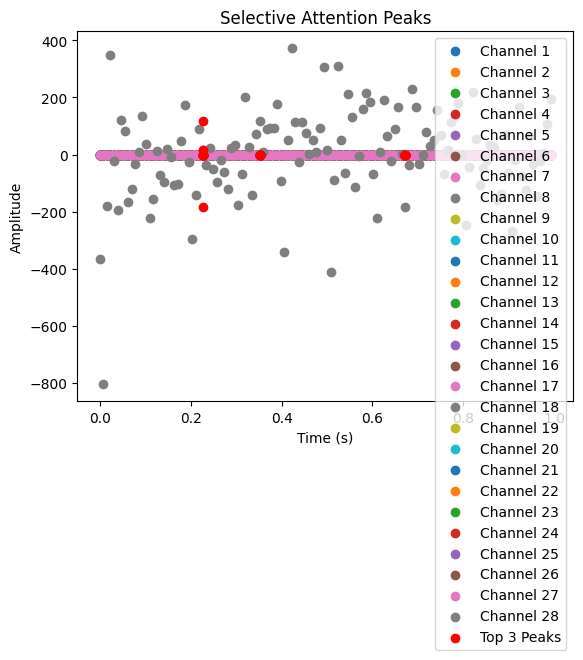

In [ ]:
data_from_raw_edf.filter(0.5, 40, fir_design='firwin')

eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])
epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)
if len(epochs) > 0:
    evoked = epochs.average()
    times = evoked.times
    data = evoked.data

    peaks = np.argmax(np.abs(data), axis=1)
    top3_peaks = peaks[:3]
    print('Значение трех пиков:', top3_peaks)

    plt.figure()
    for i in range(data.shape[0]):
        plt.scatter(times, data[i, :], label=f'Channel {i + 1}')

    # Подготовим координаты для выделения красным цветом трех пиков
    red_x = np.repeat(times[top3_peaks], data.shape[0])
    red_y = data[:, top3_peaks].flatten()

    plt.scatter(red_x, red_y, color='red', marker='o', label='Top 3 Peaks')
    plt.title('Selective Attention Peaks')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

else:
    print("Нет данных для создания эпох после фильтрации.")


In [ ]:

# Подготовка данных
data_from_raw_edf.filter(0.5, 40, fir_design='firwin')

eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])
epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)

if len(epochs) > 0:
    evoked = epochs.average()
    data = evoked.data

    amplitude_threshold_low = -200.0
    amplitude_threshold_high = 140.0

    # Определение уровня внимания на основе амплитуды пиков
    mean_amplitude = np.mean(np.abs(data))

    if mean_amplitude < amplitude_threshold_low:
        level_attention = "Low"
    elif amplitude_threshold_low <= mean_amplitude < amplitude_threshold_high:
        level_attention = "Medium"
    else:
        level_attention = "High"

    print(f"Уровень селективного внимания: {level_attention}")

else:
    print("Нет данных для создания эпох после фильтрации.")




Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (6.602 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
225 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 225 events and 128 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Уровень селективного внимания: Medium


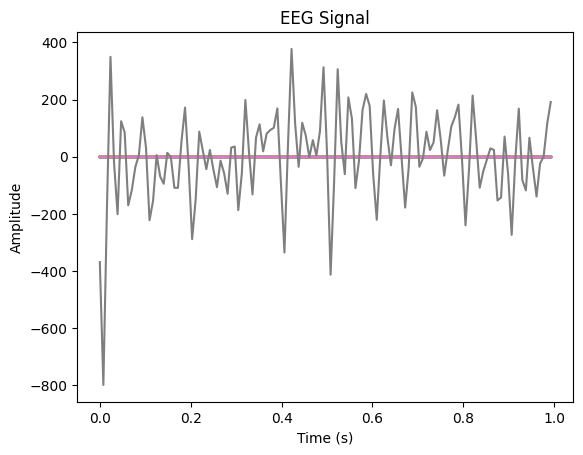

In [ ]:

    plt.figure()
    plt.plot(evoked.times, data.T)
    plt.title('EEG Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (6.602 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
225 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 225 events and 128 original time points ...
0 bad epochs dropped
Нижний порог амплитуды: 1.071884689361623e-06
Верхний порог амплитуды: 3.2988693070424453e-06
Уровень селективного внимания: High


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


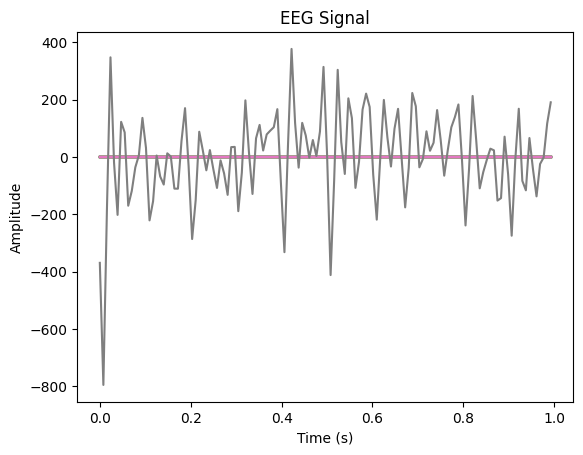

In [ ]:

data_from_raw_edf.filter(0.5, 40, fir_design='firwin')
eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])
epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)
if len(epochs) > 0:
    evoked = epochs.average()
    data = evoked.data
    amplitude_threshold_low = np.percentile(np.abs(data), 25)  # 25-й процентиль
    amplitude_threshold_high = np.percentile(np.abs(data), 75)  # 75-й процентиль

    print(f"Нижний порог амплитуды: {amplitude_threshold_low}")
    print(f"Верхний порог амплитуды: {amplitude_threshold_high}")

    mean_amplitude = np.mean(np.abs(data))

    if mean_amplitude < amplitude_threshold_low:
        level_attention = "Low"
    elif amplitude_threshold_low <= mean_amplitude < amplitude_threshold_high:
        level_attention = "Medium"
    else:
        level_attention = "High"

    print(f"Уровень селективного внимания: {level_attention}")

    plt.figure()
    plt.plot(evoked.times, data.T)
    plt.title('EEG Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
else:
    print("Нет данных для создания эпох после фильтрации.")


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (6.602 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
225 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 225 events and 128 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Нижний порог амплитуды: 1.0633e-06
Верхний порог амплитуды: 3.2971e-06
Уровень селективного внимания: High


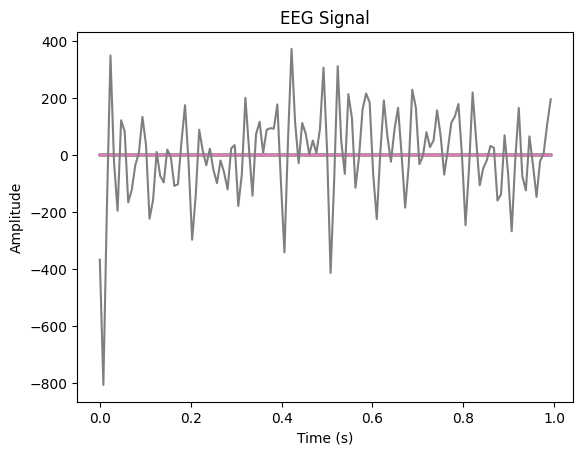

In [ ]:
data_from_raw_edf.filter(0.5, 40, fir_design='firwin')
eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])
epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)

if len(epochs) > 0:
    evoked = epochs.average()
    data = evoked.data
    amplitude_threshold_low = f"{np.percentile(np.abs(data), 25):.4e}"
    amplitude_threshold_high = f"{np.percentile(np.abs(data), 75):.4e}"
    print(f"Нижний порог амплитуды: {amplitude_threshold_low}")
    print(f"Верхний порог амплитуды: {amplitude_threshold_high}")
    mean_amplitude = np.mean(np.abs(data))

    if mean_amplitude < float(amplitude_threshold_low):
        level_attention = "Low"

    elif float(amplitude_threshold_low) <= mean_amplitude < float(amplitude_threshold_high):
        level_attention = "Medium"

    else:
        level_attention = "High"

    print(f"Уровень селективного внимания: {level_attention}")
    plt.figure()
    plt.plot(evoked.times, data.T)
    plt.title('EEG Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
else:
    print("Нет данных для создания эпох после фильтрации.")


In [ ]:
# https://cyberleninka.ru/article/n/vzaimosvyaz-eeg-pokazateley-i-urovnya-razvitiya-proizvolnogo-vnimaniya-u-detey-5-9-let/viewer

data_from_raw_edf.filter(4, 8, fir_design='firwin', verbose=False)  # для тета-ритма (4-8 Гц)
data_from_raw_edf.filter(8, 13, fir_design='firwin', verbose=False)  # для альфа-ритма (8-13 Гц)

alpha_power = data_from_raw_edf.copy().pick("eeg").filter(8, 13, l_trans_bandwidth='auto', h_trans_bandwidth='auto').apply_hilbert(envelope=True).get_data().mean(axis=-1)
theta_power = data_from_raw_edf.copy().pick("eeg").filter(4, 8, l_trans_bandwidth='auto', h_trans_bandwidth='auto').apply_hilbert(envelope=True).get_data().mean(axis=-1)

ratio_alpha_theta = alpha_power.mean() / theta_power.mean()

average_alpha_power = alpha_power.mean()
average_theta_power = theta_power.mean()

print("Альфа-ритм:", average_alpha_power)
print("Тета-ритм:", average_theta_power)

print("Отношение амплитуд поддиапазонов альфа к амплитуде тета:", ratio_alpha_theta)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Альфа-ритм: 1.5946521303878267
Тета-ритм: 1.5565175730804341
Отношение амплитуд поддиапазонов альфа к амплитуде тета: 1.0244999208276988


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [ ]:

data_from_raw_edf.filter(8, 13, fir_design='firwin', verbose=False)

data = data_from_raw_edf.get_data()

alpha_idx = np.where((8 <= data_from_raw_edf.times) & (data_from_raw_edf.times <= 13))[0]
theta_idx = np.where((4 <= data_from_raw_edf.times) & (data_from_raw_edf.times <= 8))[0]

alpha_power = np.mean(data[:, alpha_idx], axis=-1)
theta_power = np.mean(data[:, theta_idx], axis=-1)
attention_index = alpha_power / theta_power

min_attention = 0.5  # Пороговое значение для уровня концентрации
average_attention = np.mean(attention_index)
if average_attention > 0.7:
    concentration_level = "Высокий"
elif average_attention > 0.4:
    concentration_level = "Средний"
else:
    concentration_level = "Низкий"

print("Уровень концентрации внимания:", concentration_level)

Уровень концентрации внимания: Высокий


In [ ]:
def determine_attention_level(mean_amplitude, amplitude_threshold_low, amplitude_threshold_high):
    if mean_amplitude < float(amplitude_threshold_low):
        return 3
    elif float(amplitude_threshold_low) <= mean_amplitude < float(amplitude_threshold_high):
        return 2
    else:
        return 1

In [ ]:

data_from_raw_edf.filter(0.5, 40, fir_design='firwin')

eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])

epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)

evoked = epochs.average()
data = evoked.data

amplitude_threshold_low = f"{np.percentile(np.abs(data), 25):.4e}"
amplitude_threshold_high = f"{np.percentile(np.abs(data), 75):.4e}"


mean_amplitude = np.mean(np.abs(data))

type_data = determine_attention_level(mean_amplitude, amplitude_threshold_low, amplitude_threshold_high)

print(type_data)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1057 samples (6.606 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
125 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 125 events and 160 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
2


#Продолжение анализа

In [ ]:

data_from_raw_edf

<RawEDF | S040R03.edf, 64 x 19680 (123.0 s), ~9.7 MB, data loaded>

In [ ]:
data_from_raw_edf.info['sfreq']

160.0

Просмотр данных

Using matplotlib as 2D backend.
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


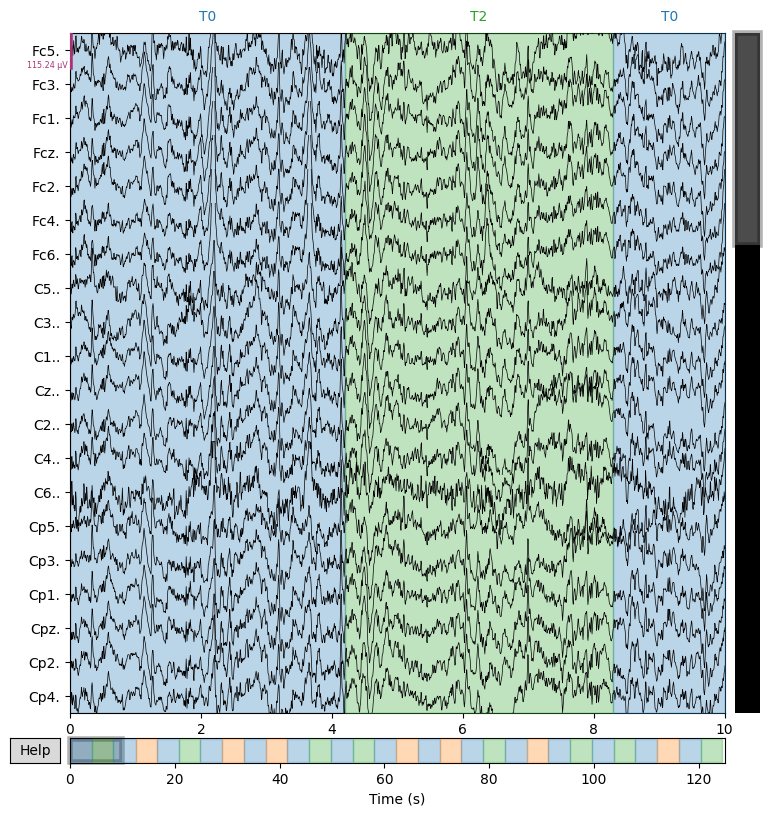

In [ ]:
data_from_raw_edf.plot(scalings = 'auto', show = False)
print(data_from_raw_edf.ch_names)

plt.show()

In [ ]:
print(data_from_raw_edf.ch_names)

['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


In [ ]:
data_from_raw_edf.ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

/usr/local/lib/python3.10/dist-packages/mne/viz/_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


ValueError: zero-size array to reduction operation maximum which has no identity

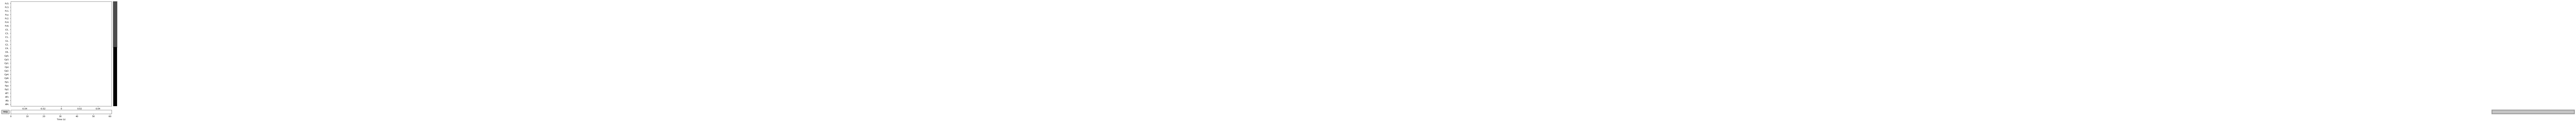

In [ ]:
# ДРУГОЙ

data_from_raw_edf.plot(start=1500, duration=50, n_channels=28 )
plt.show()

#Отношение амплитуд и уровень внимания

In [ ]:
duration_in_seconds = data_from_raw_edf.times[-1]

print("Продолжительность записи EDF: ", duration_in_seconds, "секунд")


Продолжительность записи EDF:  124.99375 секунд


In [ ]:
# количество секунд

# name = 'S001R03.edf' = 124.99375
# name = 'S002R03.edf' = 122.99375
# name = 'S003R03.edf' = 124.99375
# name = 'S004R03.edf' = 122.99375
# name = 'S005R03.edf' = 122.99375
# name = 'S006R03.edf' = 122.99375
# name = 'S007R03.edf' = 124.99375
# name = 'S008R03.edf' = 122.99375
# name = 'S009R03.edf' = 122.99375
# name = 'S010R03.edf' = 122.99375
# name = 'S012R03.edf' = 122.99375
# name = 'S013R03.edf' = 122.99375
# name = 'S014R03.edf' = 122.99375
# name = 'S015R03.edf' = 122.99375

In [ ]:
# https://cyberleninka.ru/article/n/vzaimosvyaz-eeg-pokazateley-i-urovnya-razvitiya-proizvolnogo-vnimaniya-u-detey-5-9-let/viewer

data_from_raw_edf.filter(4, 8, fir_design='firwin', verbose=False)
data_from_raw_edf.filter(8, 13, fir_design='firwin', verbose=False)

alpha_power = data_from_raw_edf.copy().pick("eeg").filter(8, 13, l_trans_bandwidth='auto', h_trans_bandwidth='auto').apply_hilbert(envelope=True).get_data().mean(axis=-1)
theta_power = data_from_raw_edf.copy().pick("eeg").filter(4, 8, l_trans_bandwidth='auto', h_trans_bandwidth='auto').apply_hilbert(envelope=True).get_data().mean(axis=-1)


ratio_alpha_theta = alpha_power.mean() / theta_power.mean()


print("Отношение амплитуд поддиапазонов альфа к амплитуде тета:", ratio_alpha_theta)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 265 samples (1.656 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Отношение амплитуд поддиапазонов альфа к амплитуде тета: 0.9940828306121186


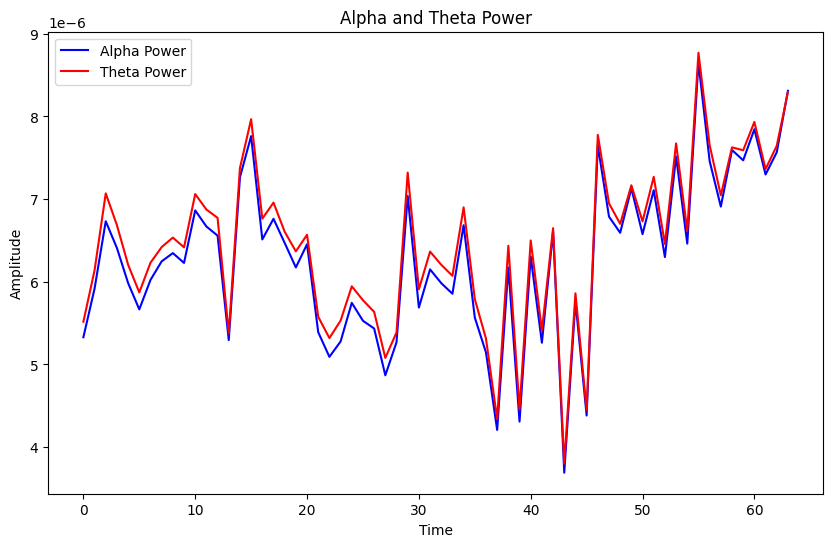

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(alpha_power, label='Alpha Power', color='blue')
plt.plot(theta_power, label='Theta Power', color='red')
plt.title('Alpha and Theta Power')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:

data_from_raw_edf.filter(4, 8, fir_design='firwin', verbose=False)  # для тета-ритма (4-8 Гц)
data_from_raw_edf.filter(8, 13, fir_design='firwin', verbose=False)  # для альфа-ритма (8-13 Гц)

alpha_power = data_from_raw_edf.copy().pick("eeg").filter(8, 13, l_trans_bandwidth='auto', h_trans_bandwidth='auto').apply_hilbert(envelope=True).get_data().mean(axis=-1)
theta_power = data_from_raw_edf.copy().pick("eeg").filter(4, 8, l_trans_bandwidth='auto', h_trans_bandwidth='auto').apply_hilbert(envelope=True).get_data().mean(axis=-1)

ratio_alpha_theta = alpha_power.mean() / theta_power.mean()

print("Отношение амплитуд поддиапазонов альфа к амплитуде тета:", ratio_alpha_theta)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 265 samples (1.656 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Отношение амплитуд поддиапазонов альфа к амплитуде тета: 0.9772733724808849


In [ ]:
sfreq = data_from_raw_edf.info['sfreq']

theta_filter = dict(l_freq=4, h_freq=8, sfreq=sfreq)
alpha_filter = dict(l_freq=8, h_freq=13, sfreq=sfreq)


raw_filtered_theta = data_from_raw_edf.copy().filter(4, 8, fir_design='firwin', verbose=False)
raw_filtered_alpha = data_from_raw_edf.copy().filter(8, 13, fir_design='firwin', verbose=False)

alpha_power = raw_filtered_alpha.pick("eeg").apply_hilbert(envelope=True).get_data().mean(axis=-1)
theta_power = raw_filtered_theta.pick("eeg").apply_hilbert(envelope=True).get_data().mean(axis=-1)

ratio_alpha_theta = alpha_power.mean() / theta_power.mean()

print("Отношение амплитуд поддиапазонов альфа к амплитуде тета:", ratio_alpha_theta)


Отношение амплитуд поддиапазонов альфа к амплитуде тета: 0.9882439595238277


In [ ]:
# Отношение амплитуд поддиапазонов альфа к амплитуде тета:

# name = 'S001R03.edf' = 0.9942726140852547,  0.9990678468393676
# name = 'S002R03.edf' = 0.9882439595238277,  0.9913643711853745
# name = 'S003R03.edf' = 0.9719137328660934,  0.9817533211765005
# name = 'S004R03.edf' = 0.985000778414256,   0.9916841952117167
# name = 'S005R03.edf' = 0.9761711755997549,  0.9905701214215366
# name = 'S006R03.edf' = 0.9446071608557659,  0.9734927283687158
# name = 'S007R03.edf' = 0.9928601487186404,  0.9959071502323207
# name = 'S008R03.edf' = 0.9826880943394831,  0.9917879906799548
# name = 'S009R03.edf' = 0.9851371981272697,  0.9916147607947654
# name = 'S010R03.edf' = 0.9857768632493772,  0.9872148019636346
# name = 'S012R03.edf' = 0.9672470504300356,  0.9857169343026208
# name = 'S013R03.edf' = 0.9740566646529393,  0.9891436243534507
# name = 'S014R03.edf' = 0.9962359775312954,  0.9943549854804492
# name = 'S015R03.edf' = 0.9836495571653724,  0.9851759534673337

In [ ]:
import os

index = 1
csv_file_path = "/content/drive/MyDrive/EEG/ratio_alpha_theta.csv"

if not os.path.exists(csv_file_path):
    with open(csv_file_path, 'w') as f:
        f.write("Отношение_амплитуд\n")

df = pd.DataFrame({
    'Отношение_амплитуд': ratio_alpha_theta
}, index=[index])
index += 1

with open(csv_file_path, 'a') as f:
    df.to_csv(f, header=False, index=False)

print(f"Новые вычисленные значения добавлены в файл: {csv_file_path}")

Новые вычисленные значения добавлены в файл: /content/drive/MyDrive/EEG/ratio_alpha_theta.csv


In [ ]:
# не запускать

df = pd.read_csv("/content/drive/MyDrive/EEG/ratio_alpha_theta.csv")

max_value = df.max()[0]
min_value = df.min()[0]
mean_value = df.mean()[0]

print("Максимальное значение:", max_value)
print("Минимальное значение:", min_value)
print("Среднее значение:", mean_value)

group1_threshold = max_value
group2_threshold = (max_value + min_value) / 2

def determine_group(value):
    if value >= group1_threshold:
        return 1
    elif value >= group2_threshold:
        return 2
    else:
        return 3

df['Группа'] = df.apply(lambda row: determine_group(row[df.columns[0]]), axis=1)

print(df)


Максимальное значение: 0.9988506132562618
Минимальное значение: 0.944607160855766
Среднее значение: 0.981351181242705
    Отношение_амплитуд  Группа
0             0.998851       1
1             0.988244       2
2             0.971914       2
3             0.985001       2
4             0.976171       2
5             0.944607       3
6             0.992860       2
7             0.982688       2
8             0.991615       2
9             0.985777       2
10            0.967247       3
11            0.974057       2
12            0.996236       2
13            0.983650       2


In [ ]:
# не заспукать

df = pd.read_csv("/content/drive/MyDrive/EEG/ratio_alpha_theta.csv")

max_value = df.max()[0]
min_value = df.min()[0]
mean_value = df.mean()[0]

print("Максимальное значение:", max_value)
print("Минимальное значение:", min_value)
print("Среднее значение:", mean_value)

quantiles = df.quantile([1/3, 2/3])

def determine_group(value):
    if value <= quantiles.iloc[0][0]:
        return 1
    elif value <= quantiles.iloc[1][0]:
        return 2
    else:
        return 3

df['Type'] = df.apply(lambda row: determine_group(row[df.columns[0]]), axis=1)
print(df)


Максимальное значение: 0.9988506132562618
Минимальное значение: 0.944607160855766
Среднее значение: 0.981351181242705
    Отношение_амплитуд  Type
0             0.998851     3
1             0.988244     3
2             0.971914     1
3             0.985001     2
4             0.976171     1
5             0.944607     1
6             0.992860     3
7             0.982688     2
8             0.991615     3
9             0.985777     2
10            0.967247     1
11            0.974057     1
12            0.996236     3
13            0.983650     2


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/EEG/ratio_alpha_theta.csv")

max_value = df.max()[0]
min_value = df.min()[0]
mean_value = df.mean()[0]

print("Максимальное значение:", max_value)
print("Минимальное значение:", min_value)
print("Среднее значение:", mean_value)

quantiles = df.quantile([1/3, 2/3])

def determine_group(value):
    if value <= quantiles.iloc[0][0]:
        return 1
    elif value <= quantiles.iloc[1][0]:
        return 2
    else:
        return 3

df['Type'] = df.apply(lambda row: determine_group(row[df.columns[0]]), axis=1)

csv_file_path = "/content/drive/MyDrive/EEG/ratio_type.csv"
df.to_csv(csv_file_path, index=False)
print(f"Файл сохранен по пути: {csv_file_path}")


Максимальное значение: 1.0390847430850405
Минимальное значение: 0.944607160855766
Среднее значение: 0.9821384554927854
Файл сохранен по пути: /content/drive/MyDrive/EEG/ratio_type.csv


In [ ]:
df_type = pd.read_csv("/content/drive/MyDrive/EEG/ratio_type.csv")

if 'Отношение_амплитуд' in df_type.columns:
    df_type.drop(columns=['Отношение_амплитуд'], inplace=True)

    csv_file_path = "/content/drive/MyDrive/EEG/ratio_type.csv"
    df_type.to_csv(csv_file_path, index=False)

    print(f"Столбец 'Отношение_амплитуд' удален из файла: {csv_file_path}")
else:
    print("Столбец 'Отношение_амплитуд' не найден в файле ratio_type.csv.")


Столбец 'Отношение_амплитуд' удален из файла: /content/drive/MyDrive/EEG/ratio_type.csv


Text(0, 0.5, 'Средняя амплитуда диапазона')

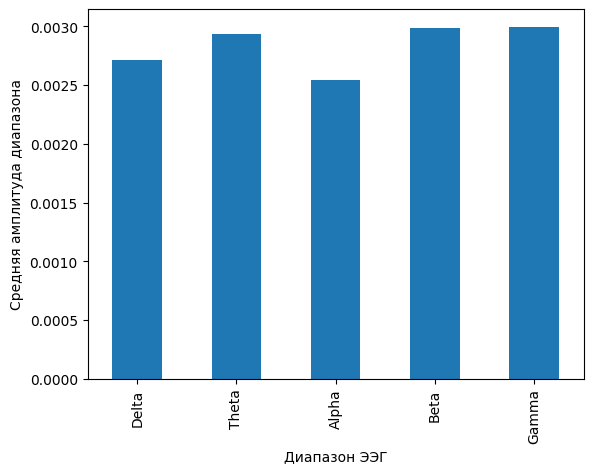

In [ ]:
data = data_from_raw_edf.get_data()

fs = data_from_raw_edf.info['sfreq']


# Получение амплитуд спектра FFT (только для положительных частот)
fft_vals = np.absolute(np.fft.rfft(data))
# Получение частот для амплитуд в Гц
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Получение среднего значения амплитуды FFT для каждого EEG-диапазона
eeg_band_fft = dict()
for band in eeg_bands:
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) &
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("Диапазон ЭЭГ")
ax.set_ylabel("Средняя амплитуда диапазона")


In [ ]:
info = mne.create_info(ch_names=['eeg'], sfreq=fs, ch_types=['eeg'])
raw = mne.io.RawArray(data.reshape(1, -1), info)
delta_power = raw.copy().filter(0, 4, fir_design='firwin', verbose=False).get_data()
theta_power = raw.copy().filter(4, 8, fir_design='firwin', verbose=False).get_data()
alpha_power = raw.copy().filter(8, 12, fir_design='firwin', verbose=False).get_data()
beta_power = raw.copy().filter(12, 30, fir_design='firwin', verbose=False).get_data()
gamma_power = raw.copy().filter(30, 45, fir_design='firwin', verbose=False).get_data()

delta_mean = np.mean(delta_power)
theta_mean = np.mean(theta_power)
alpha_mean = np.mean(alpha_power)
beta_mean = np.mean(beta_power)
gamma_mean = np.mean(gamma_power)

print("Delta Mean Amplitude:", delta_mean)
print("Theta Mean Amplitude:", theta_mean)
print("Alpha Mean Amplitude:", alpha_mean)
print("Beta Mean Amplitude:", beta_mean)
print("Gamma Mean Amplitude:", gamma_mean)


Creating RawArray with float64 data, n_channels=1, n_times=1024
    Range : 0 ... 1023 =      0.000 ...     1.998 secs
Ready.
Delta Mean Amplitude: 50.07336113686692
Theta Mean Amplitude: 0.23700254357478884
Alpha Mean Amplitude: 0.01792719464503445
Beta Mean Amplitude: 0.04865073421820407
Gamma Mean Amplitude: 0.04221320112958493


In [ ]:
# не запускать

import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

csv_file_path = "/content/drive/MyDrive/EEG/ratio_alpha_theta.csv"
df = pd.read_csv(csv_file_path)

ratio_alpha_theta = df['Отношение_амплитуд'].values[0]
attention_level = ctrl.Consequent(np.arange(1, 4, 1), 'attention_level')

attention_level['low'] = fuzz.trimf(attention_level.universe, [1, 1, 2])
attention_level['medium'] = fuzz.trimf(attention_level.universe, [1, 2, 3])
attention_level['high'] = fuzz.trimf(attention_level.universe, [2, 3, 3])

# Определение нечетких правил
# Определение термов для относительной характеристики уровня внимания
rel_attention = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'rel_attention')
rel_attention.automf(3)

# Нечеткое выводление
# Определение нечетких правил
rule1 = ctrl.Rule(rel_attention['good'], attention_level['high'])
rule2 = ctrl.Rule(rel_attention['poor'], attention_level['low'])
rule3 = ctrl.Rule(rel_attention['average'], attention_level['medium'])

# Построение модели нечеткого контроллера
attention_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
attention_level_estimator = ctrl.ControlSystemSimulation(attention_ctrl)

# Применение отношения альфа к тета к нечеткому контроллеру и получение уровня внимания
attention_level_estimator.input['rel_attention'] = ratio_alpha_theta
attention_level_estimator.compute()

# Получение результата нечеткого вывода
fuzzy_attention_level = attention_level_estimator.output['attention_level']

# Дефаззификация
# Полученная нечеткая оценка уровня внимания преобразуется в четкое значение
defuzzified_attention_level = attention_level_estimator.output['attention_level']

# Вывод уровня внимания
if defuzzified_attention_level <= 1.5:
    print("Уровень внимания: Низкий")
elif defuzzified_attention_level <= 2.5:
    print("Уровень внимания: Средний")
else:
    print("Уровень внимания: Высокий")

# plt.figure(figsize=(8, 6))
# rel_attention.view()
# attention_level.view(sim=attention_level_estimator)
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(x_values, low_values, 'b', linewidth=1.5, label='Low')
# plt.plot(x_values, medium_values, 'g', linewidth=1.5, label='Medium')
# plt.plot(x_values, high_values, 'r', linewidth=1.5, label='High')
# plt.title('Fuzzy Memberships for Attention Level')
# plt.xlabel('Attention Ratio (Alpha/Theta)')
# plt.ylabel('Membership')
# plt.legend()
# plt.axvline(x=ratio_alpha_theta, color='k', linestyle='--', linewidth=1.5)
# plt.text(ratio_alpha_theta, 0.5, f'Ratio Alpha/Theta: {ratio_alpha_theta}', rotation=90, va='center', ha='right', backgroundcolor='w')
# plt.show()


Уровень внимания: Высокий


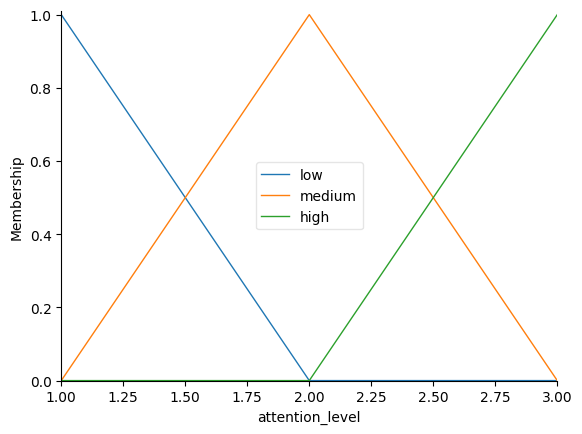

In [ ]:
attention_level.view()

In [ ]:
# не запускать

import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

csv_file_path = "/content/drive/MyDrive/EEG/ratio_alpha_theta.csv"
df = pd.read_csv(csv_file_path)
ratios = df['Отношение_амплитуд'].values
attention_levels = []

attention_level = ctrl.Consequent(np.arange(1, 4, 1), 'attention_level')
attention_level['low'] = fuzz.trimf(attention_level.universe, [1, 1, 2])
attention_level['medium'] = fuzz.trimf(attention_level.universe, [1, 2, 3])
attention_level['high'] = fuzz.trimf(attention_level.universe, [2, 3, 3])

rel_attention = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'rel_attention')
rel_attention.automf(3)

rule1 = ctrl.Rule(rel_attention['good'], attention_level['high'])
rule2 = ctrl.Rule(rel_attention['poor'], attention_level['low'])
rule3 = ctrl.Rule(rel_attention['average'], attention_level['medium'])

attention_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
attention_level_estimator = ctrl.ControlSystemSimulation(attention_ctrl)

quantiles = df.quantile([1/3, 2/3])

def determine_group(value):
    if value <= quantiles.iloc[0][0]:
        return 1
    elif value <= quantiles.iloc[1][0]:
        return 2
    else:
        return 3

for ratio_alpha_theta in ratios:
    attention_level_estimator.input['rel_attention'] = ratio_alpha_theta
    attention_level_estimator.compute()
    defuzzified_attention_level = attention_level_estimator.output['attention_level']

    attention_levels.append(determine_group(defuzzified_attention_level))

df['Attention_Level'] = attention_levels

output_csv_file_path = "/content/drive/MyDrive/EEG/attention_levels.csv"
df.to_csv(output_csv_file_path, index=False)

print(f"Файл сохранен по пути: {output_csv_file_path}")


Файл сохранен по пути: /content/drive/MyDrive/EEG/attention_levels.csv


In [ ]:
# НЕЧЕТКИЙ АЛГОРИТМ ОПРЕДЕЛЕНИЯ УРОВНЯ ВНИМАНИЯ

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/EEG/ratio_alpha_theta.csv")

max_value = df.max()[0]
min_value = df.min()[0]
mean_value = df.mean()[0]

print("Максимальное значение:", max_value)
print("Минимальное значение:", min_value)
print("Среднее значение:", mean_value)

quantiles = df.quantile([1/3, 2/3])

# Определение лингвистических переменных для входной и выходной переменных
input_terms = {
    'low': (min_value, quantiles.iloc[0][0], quantiles.iloc[1][0]),
    'medium': (quantiles.iloc[0][0], quantiles.iloc[1][0], max_value),
    'high': (quantiles.iloc[1][0], max_value, max_value)  # Также используем максимальное значение, чтобы учесть случаи, когда значения выходят за пределы квантилей
}

output_terms = {
    'low': 1,
    'medium': 2,
    'high': 3
}

# Определение нечетких правил
fuzzy_rules = {
    ('high',): 3,
    ('low',): 1,
    ('medium',): 2
}

# Функция для определения номера группы
def determine_group(value):
    if value <= quantiles.iloc[0][0]:
        return 1
    elif value <= quantiles.iloc[1][0]:
        return 2
    else:
        return 3

df['Type'] = df.apply(lambda row: determine_group(row[df.columns[0]]), axis=1)

# Нечеткое выводление
def fuzzy_inference(relative_characteristic):
    output_values = []
    for input_value in input_terms.keys():
        if (input_value,) in fuzzy_rules:
            output_value = fuzzy_rules[(input_value,)]
            output_values.append((output_value, input_terms[input_value]))
    return output_values

# Получение нечетких выводов
fuzzy_outputs = fuzzy_inference(mean_value)

# Дефаззификация: преобразование нечетких выводов в четкие значения
def defuzzification(fuzzy_outputs):
    crisp_value = None
    for output_value, _ in fuzzy_outputs:
        crisp_value = output_value
    return crisp_value

# Получение четкого значения уровня внимания
attention_level = defuzzification(fuzzy_outputs)

csv_file_path = "/content/drive/MyDrive/EEG/ratio_type.csv"
df.to_csv(csv_file_path, index=False)

print(f"Файл сохранен по пути: {csv_file_path}")


Максимальное значение: 1.0390847430850405
Минимальное значение: 0.944607160855766
Среднее значение: 0.9821384554927854
Файл сохранен по пути: /content/drive/MyDrive/EEG/ratio_type.csv


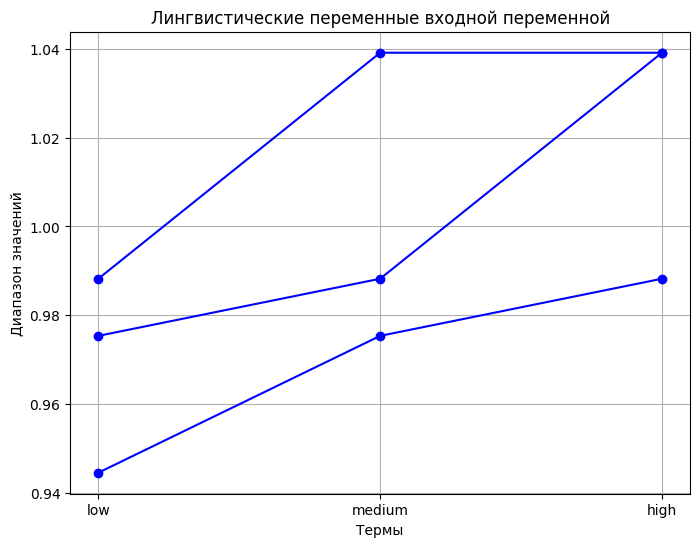

In [ ]:
import matplotlib.pyplot as plt


labels = list(input_terms.keys())
values = list(input_terms.values())

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', linestyle='-', color='b')
plt.title('Лингвистические переменные входной переменной')
plt.xlabel('Термы')
plt.ylabel('Диапазон значений')
plt.grid(True)
plt.show()


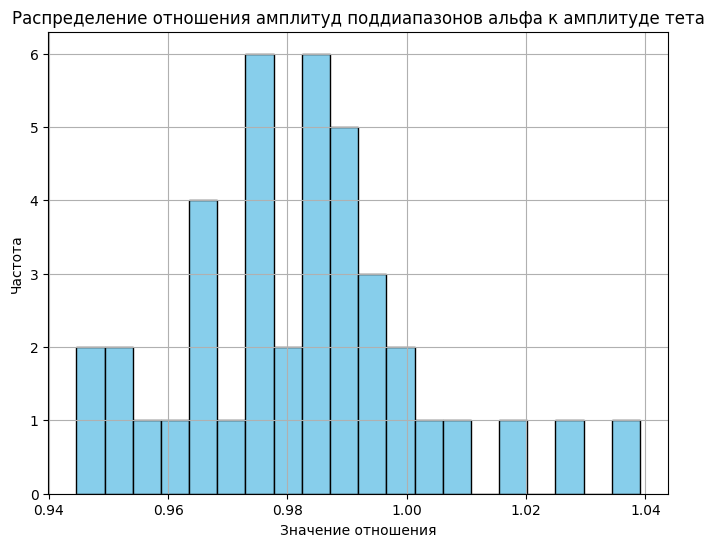

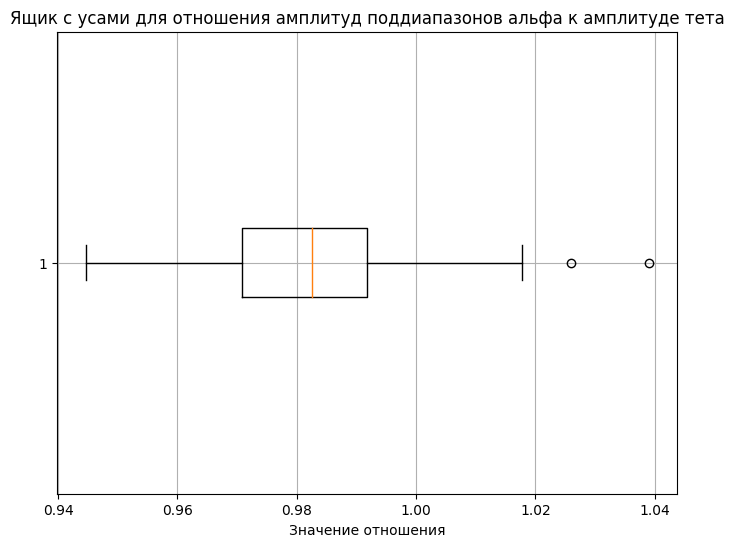

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/EEG/ratio_alpha_theta.csv")

plt.figure(figsize=(8, 6))
plt.hist(df[df.columns[0]], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение отношения амплитуд поддиапазонов альфа к амплитуде тета')
plt.xlabel('Значение отношения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df[df.columns[0]], vert=False)
plt.title('Ящик с усами для отношения амплитуд поддиапазонов альфа к амплитуде тета')
plt.xlabel('Значение отношения')
plt.grid(True)
plt.show()


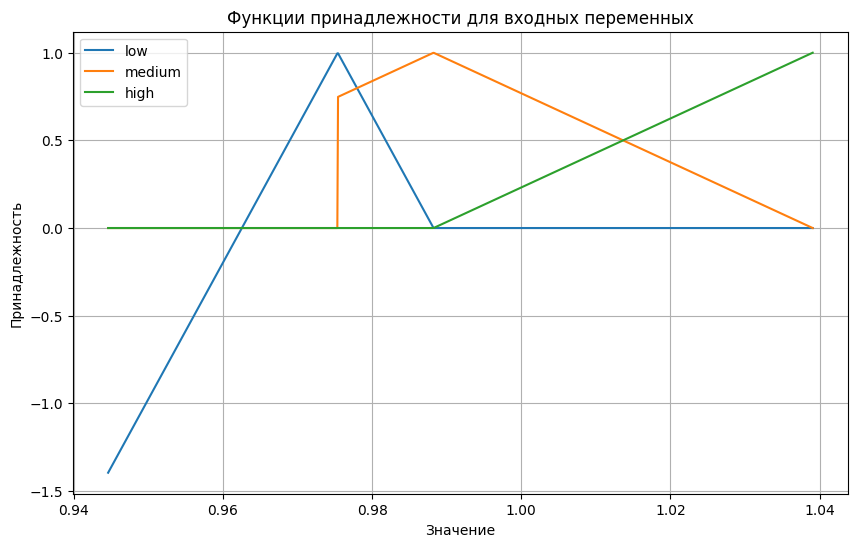

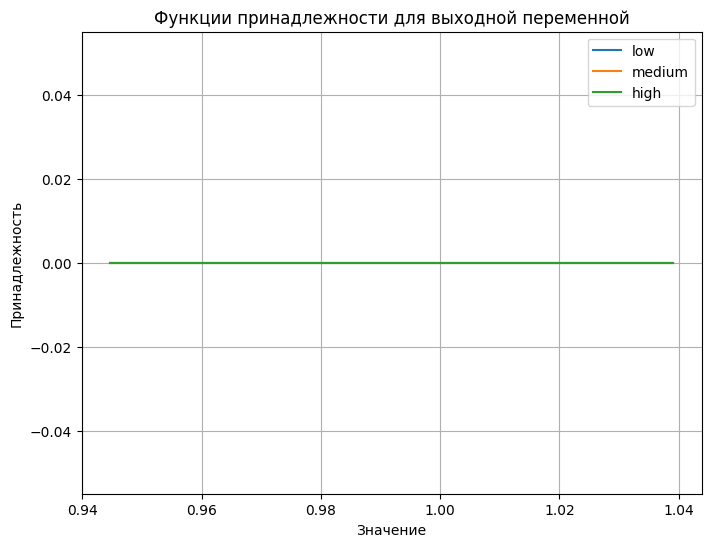

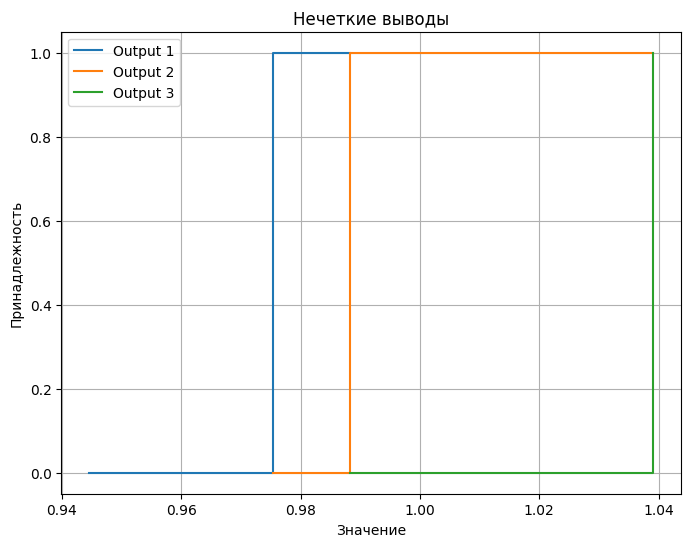

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(min_value, max_value, 1000)

plt.figure(figsize=(10, 6))
for term, (a, b, c) in input_terms.items():
    y = np.zeros_like(x)
    y[(x >= a) & (x <= c)] = ((x[(x >= a) & (x <= c)] - a) / (c - a)) if b == c else 1 - np.abs(x[(x >= a) & (x <= c)] - b) / (c - b)
    plt.plot(x, y, label=term)

plt.title('Функции принадлежности для входных переменных')
plt.xlabel('Значение')
plt.ylabel('Принадлежность')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
for term, value in output_terms.items():
    y = np.zeros_like(x)
    y[x == value] = 1
    plt.plot(x, y, label=term)

plt.title('Функции принадлежности для выходной переменной')
plt.xlabel('Значение')
plt.ylabel('Принадлежность')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
for output_value, term_range in fuzzy_outputs:
    plt.plot([term_range[0], term_range[1], term_range[1], term_range[2]], [0, 0, 1, 1], label=f'Output {output_value}')

plt.title('Нечеткие выводы')
plt.xlabel('Значение')
plt.ylabel('Принадлежность')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

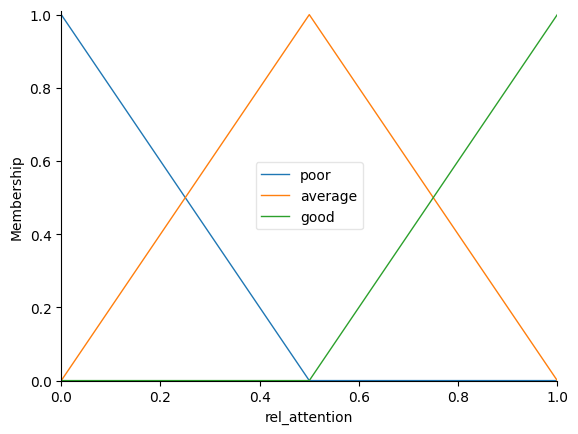

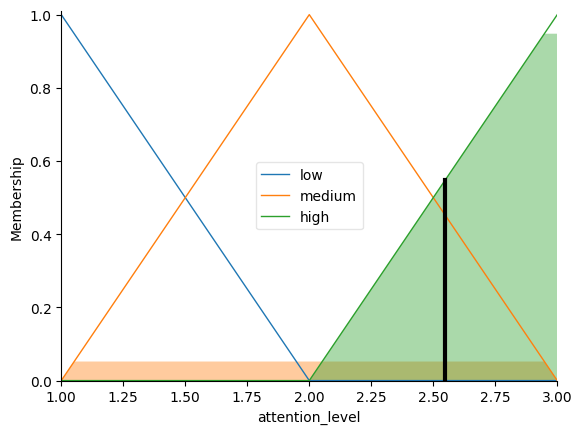

In [ ]:
plt.figure(figsize=(8, 6))
rel_attention.view()
attention_level.view(sim=attention_level_estimator)
plt.show()

#Число отчетов и выходная переменная

In [ ]:
eeg_data, eeg_times = data_from_raw_edf.get_data(return_times=True)
print('Число отчетов во временном ряду:', len(eeg_times))
t_index_begin = 1500
t_index_end = 20000
t = eeg_times[t_index_begin:t_index_end]
T = t[-1]
N = len(t)
y = eeg_data[2, t_index_begin:t_index_end]

print('Временной диапазон для обработки данных:', t)
print('Значение времени в конце сигнала:', T)
print('Количество элементов во временном ряду:', N)


# data_from_raw_edf[0][0][94185:96185] - такой же ответ

Число отчетов во временном ряду: 20000
Временной диапазон для обработки данных: [  9.375     9.38125   9.3875  ... 124.98125 124.9875  124.99375]
Значение времени в конце сигнала: 124.99375
Количество элементов во временном ряду: 18500


In [ ]:
eeg_data, eeg_times = data_from_raw_edf.get_data(return_times=True)

total_time_points = len(eeg_times)
print('Общее количество временных меток:', total_time_points)

max_t_index_begin = 0
max_t_index_end = total_time_points - 1

print('Максимальное значение для t_index_begin:', max_t_index_begin)
print('Максимальное значение для t_index_end:', max_t_index_end)


Общее количество временных меток: 19680
Максимальное значение для t_index_begin: 0
Максимальное значение для t_index_end: 19679


In [ ]:
eeg_data, eeg_times = data_from_raw_edf.get_data(return_times=True)
print('число отчетов во временном ряду:',len(eeg_times))
t_index_begin = 1500
t_index_end = 20000
t = eeg_times[t_index_begin:t_index_end]
T = t[-1]
N = len(t)
y = eeg_data[2, t_index_begin:t_index_end]


число отчетов во временном ряду: 19680


In [ ]:
random.gauss(0, 0.5)

0.6014518294349493

In [ ]:
# функция генерации сигнала стохастического
# аддитивный белый гауссовский шум
def awgn(mu, noise_sigma, data_size, white_noise_power):
    t = np.arange(0, data_size, 1.)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size))

    for i in range(data_size):
        random.seed(int(t[i]))
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = white_noise_power * noise[i]

    return y
N = 60*5
T = 5.0
t = np.linspace(0, T, N)
fs = 1 / (t[1] - t[0])
signal_pure = np.ones(len(t))
signal_with_noise = signal_pure + awgn(0, 0.5, len(t), 1)
np.random.shuffle(signal_with_noise)
y = signal_with_noise

<ipython-input-8-ad81a0aa3920>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = white_noise_power * noise[i]


In [ ]:
def snr_white_noise(signal, mean_noise, target_snr_db):
    # Добавление шума с использованием целевого SNR
    sig_avg_watts = np.mean(signal**2)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(signal))
    y_awgn = signal + noise_volts
    return y_awgn

SNR = 10
N = 60*5
T = 5.0
t = np.linspace(0, T, N)
fs = 1 / (t[1] - t[0])
signal_pure = np.ones(len(t))
signal_with_noise = snr_white_noise(signal_pure, 0, SNR)
y = signal_with_noise

In [ ]:
# фрактальный стохастический сигнал

from MFDFA import fgn
T = 200
delta_t = 0.1
theta = 0.3
sigma = 0.1
t = np.arange(0, T, delta_t)
fs = 1 / (t[1] - t[0])

# Дробный гауссовский шум
H = 0.7
dB = (T ** H) * fgn(N = t.size, H = H)
y = np.zeros([t.size])

# Интегрируем процесс
for i in range(1, t.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dB[i]

# Создание DataFrame из полученных значений (csv)

In [ ]:

def autocorr(signal, time_period):
  y_acorr = len(time_period) * [0]
  mean = sum(signal)/len(time_period)
  var = sum([(y - mean)**2 for y in signal]) / len(time_period)
  y_norm = [y - mean for y in signal]
  idx = range(len(time_period))
  for l in idx:
      c = 1
      if (l>0):
        tmp = [y_norm[l:][i] * y_norm[:-l][i] for i in range(len(signal) - l)]
        c = sum(tmp) / len(signal) / var
      y_acorr[l] = c
  return y_acorr

In [ ]:
from MFDFA import MFDFA

import os
from statsmodels.tsa.stattools import acf

from hurst import compute_Hc

mean_data = np.mean(y)
std_data = np.std(y)

f, psd = signal.periodogram(y, fs)
mean_psd = np.mean(psd)

y_acorr = autocorr(y,t)
acf_data = np.mean(y_acorr)


lag = np.unique(np.logspace(0.5, 3, 100, dtype=int))
q = 2
order = 1
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)
del_nan = np.argwhere(np.isnan(dfa))
dfa = np.delete(dfa,del_nan[:,0])
lag = np.delete(lag,del_nan[:,0])
H_hat, C_hat = np.polyfit(np.log10(lag)[0:-1],np.log10(dfa[0:-1]),1)

hurst_data = H_hat

index = 1
csv_file_path = "/content/drive/MyDrive/EEG/csv_04_04.csv"

if not os.path.exists(csv_file_path):
    with open(csv_file_path, 'w') as f:
        f.write("Математическое ожидание,Среднеквадратическое отклонение,Спектральная плотность,Автокорреляция,Экспонента Херста\n")

df = pd.DataFrame({
    'Математическое ожидание': mean_data,
    'Среднеквадратическое отклонение': std_data,
    'Спектральная плотность': mean_psd,
    'Автокорреляция': acf_data,
    'Экспонента Херста': hurst_data
}, index=[index])

index += 1
with open(csv_file_path, 'a') as f:
    df.to_csv(f, header=False, index=False)

print(f"Новые вычисленные значения добавлены в файл: {csv_file_path}")


Новые вычисленные значения добавлены в файл: /content/drive/MyDrive/EEG/csv_04_04.csv


In [ ]:
import pandas as pd
import os

df_ratio_type = pd.read_csv("/content/drive/MyDrive/EEG/ratio_type.csv")
csv_file_path = "/content/drive/MyDrive/EEG/csv_04_04.csv"
if os.path.exists(csv_file_path):
    df_csv_04_04 = pd.read_csv(csv_file_path)
else:
    df_csv_04_04 = pd.DataFrame(columns=['Математическое ожидание', 'Среднеквадратическое отклонение', 'Спектральная плотность', 'Автокорреляция', 'Экспонента Херста'])


df_csv_04_04['Type'] = df_ratio_type['Type']
csv_file_path = "/content/drive/MyDrive/EEG/csv_04_04.csv"
df_csv_04_04.to_csv(csv_file_path, index=False)
print(f"Данные из файла ratio_type.csv добавлены в файл csv_04_04.csv: {csv_file_path}")


Данные из файла ratio_type.csv добавлены в файл csv_04_04.csv: /content/drive/MyDrive/EEG/csv_04_04.csv


In [ ]:
import pandas as pd

df_csv_04_04 = pd.read_csv("/content/drive/MyDrive/EEG/csv_04_04.csv")
df_csv_04_04 = df_csv_04_04.drop('Автокорреляция', axis=1, errors='ignore')
csv_file_path = "/content/drive/MyDrive/EEG/csv_04_04.csv"

df_csv_04_04.to_csv(csv_file_path, index=False)

print("Столбец 'Автокорреляция' успешно удален из файла csv_04_04.csv.")


Столбец 'Автокорреляция' успешно удален из файла csv_04_04.csv.


не запускать код ниже

In [ ]:
# Функция для определения типа get_type
def determine_attention_level(mean_amplitude, amplitude_threshold_low, amplitude_threshold_high):
    if mean_amplitude < float(amplitude_threshold_low):
        return 3
    elif float(amplitude_threshold_low) <= mean_amplitude < float(amplitude_threshold_high):
        return 2
    else:
        return

def autocorr(signal, time_period):
  y_acorr = len(time_period) * [0]
  mean = sum(signal)/len(time_period)
  var = sum([(y - mean)**2 for y in signal]) / len(time_period)
  y_norm = [y - mean for y in signal]
  idx = range(len(time_period))
  for l in idx:
      c = 1
      if (l>0):
        tmp = [y_norm[l:][i] * y_norm[:-l][i] for i in range(len(signal) - l)]
        c = sum(tmp) / len(signal) / var
      y_acorr[l] = c
  return y_acorr

In [ ]:
# не запускать

from statsmodels.tsa.stattools import acf

from hurst import compute_Hc
data_from_raw_edf.filter(0.5, 40, fir_design='firwin')

eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])
epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)

evoked = epochs.average()
data = evoked.data
amplitude_threshold_low = f"{np.percentile(np.abs(data), 25):.4e}"
amplitude_threshold_high = f"{np.percentile(np.abs(data), 75):.4e}"
mean_amplitude = np.mean(np.abs(data))

mean_data = np.mean(y)
std_data = np.std(y)
f, psd = signal.periodogram(y, fs)
mean_psd = np.mean(psd)
y_acorr = autocorr(y,t)
acf_data = np.mean(y_acorr)
hurst_data = np.apply_along_axis(lambda x: compute_Hc(x)[0], axis=1, arr=data_from_raw_edf.get_data())

H, c, data = compute_Hc(y, kind='change', simplified=False)
hurst_data = H

type_data = determine_attention_level(mean_amplitude, amplitude_threshold_low, amplitude_threshold_high)

index = 1
df = pd.DataFrame({
    'Математическое ожидание': mean_data,
    'Среднеквадратическое отклонение': std_data,
    'Спектральная плотность': mean_psd,
    'Автокорреляция': acf_data,
    'Экспонента Херста': hurst_data,
    'Type': type_data
}, index=[index])
index += 1
csv_file_path = "/content/drive/MyDrive/EEG/name_data.csv"


with open(csv_file_path, 'a') as f:
    df.to_csv(f, header=False, index=False)
print(f"Новые вычисленные значения добавлены в файл: {csv_file_path}")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1057 samples (6.606 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
61 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 61 events and 160 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


KeyboardInterrupt: 

In [ ]:
# не запускать

import os
from statsmodels.tsa.stattools import acf

from hurst import compute_Hc

data_from_raw_edf.filter(0.5, 40, fir_design='firwin')
eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])
epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)

evoked = epochs.average()
data = evoked.data
amplitude_threshold_low = f"{np.percentile(np.abs(data), 25):.4e}"
amplitude_threshold_high = f"{np.percentile(np.abs(data), 75):.4e}"
mean_amplitude = np.mean(np.abs(data))
mean_data = np.mean(y)
std_data = np.std(y)

f, psd = signal.periodogram(y, fs)
mean_psd = np.mean(psd)
y_acorr = autocorr(y,t)
acf_data = np.mean(y_acorr)
hurst_data = np.apply_along_axis(lambda x: compute_Hc(x)[0], axis=1, arr=data_from_raw_edf.get_data())

H, c, data = compute_Hc(y, kind='change', simplified=False)
hurst_data = H

type_data = determine_attention_level(mean_amplitude, amplitude_threshold_low, amplitude_threshold_high)

index = 1
csv_file_path = "/content/drive/MyDrive/EEG/csv_file_path.csv"
if not os.path.exists(csv_file_path):
    with open(csv_file_path, 'w') as f:
        f.write("Математическое ожидание,Среднеквадратическое отклонение,Спектральная плотность,Автокорреляция,Экспонента Херста,Type\n")
df = pd.DataFrame({
    'Математическое ожидание': mean_data,
    'Среднеквадратическое отклонение': std_data,
    'Спектральная плотность': mean_psd,
    'Автокорреляция': acf_data,
    'Экспонента Херста': hurst_data,
    'Type': type_data
}, index=[index])

index += 1

with open(csv_file_path, 'a') as f:
    df.to_csv(f, header=False, index=False)

print(f"Новые вычисленные значения добавлены в файл: {csv_file_path}")


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.4s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
6336 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 6336 events and 500 original time points ...
0 bad epochs dropped


KeyboardInterrupt: 

In [ ]:
# разделила на три

In [ ]:
import os
from statsmodels.tsa.stattools import acf

from hurst import compute_Hc

data_from_raw_edf.filter(0.5, 40, fir_design='firwin')

eeg_channels = mne.pick_types(data_from_raw_edf.info, eeg=True)
raw_eeg = data_from_raw_edf.copy().pick_channels([data_from_raw_edf.ch_names[i] for i in eeg_channels])

epochs = mne.make_fixed_length_epochs(raw_eeg, duration=1, preload=True)

evoked = epochs.average()
data = evoked.data

amplitude_threshold_low = f"{np.percentile(np.abs(data), 25):.4e}"
amplitude_threshold_high = f"{np.percentile(np.abs(data), 75):.4e}"

mean_amplitude = np.mean(np.abs(data))
mean_data = np.mean(y)
std_data = np.std(y)
f, psd = signal.periodogram(y, fs)
mean_psd = np.mean(psd)
y_acorr = autocorr(y,t)
acf_data = np.mean(y_acorr)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1057 samples (6.606 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
125 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 125 events and 160 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [ ]:

hurst_data = np.apply_along_axis(lambda x: compute_Hc(x)[0], axis=1, arr=data_from_raw_edf.get_data())

H, c, data = compute_Hc(y, kind='change', simplified=False)
hurst_data = H

print(hurst_data)

NameError: name 'compute_Hc' is not defined

In [ ]:
#другой вариант вычисления экспоненты Херста

from MFDFA import MFDFA
lag = np.unique(np.logspace(0.5, 3, 100, dtype=int))
q = 2
order = 1
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)
del_nan = np.argwhere(np.isnan(dfa))
dfa = np.delete(dfa,del_nan[:,0])
lag = np.delete(lag,del_nan[:,0])
H_hat, C_hat = np.polyfit(np.log10(lag)[0:-1],np.log10(dfa[0:-1]),1)

hurst_data = H_hat

print(hurst_data)

1.2730959067378775


In [ ]:

type_data = determine_attention_level(mean_amplitude, amplitude_threshold_low, amplitude_threshold_high)

index = 1
csv_file_path = "/content/drive/MyDrive/EEG/проверка .csv"
if not os.path.exists(csv_file_path):
    with open(csv_file_path, 'w') as f:
        f.write("Математическое ожидание,Среднеквадратическое отклонение,Спектральная плотность,Автокорреляция,Экспонента Херста,Type\n")

df = pd.DataFrame({
    'Математическое ожидание': mean_data,
    'Среднеквадратическое отклонение': std_data,
    'Спектральная плотность': mean_psd,
    'Автокорреляция': acf_data,
    'Экспонента Херста': hurst_data,
    'Type': type_data
}, index=[index])
index += 1
with open(csv_file_path, 'a') as f:
    df.to_csv(f, header=False, index=False)
print(f"Новые вычисленные значения добавлены в файл: {csv_file_path}")


Новые вычисленные значения добавлены в файл: /content/drive/MyDrive/EEG/data_safe.csv


In [ ]:
print(data_from_raw_edf.get_data().shape)


(28, 28800)


# Базовые методы исследования стохастического сигнала

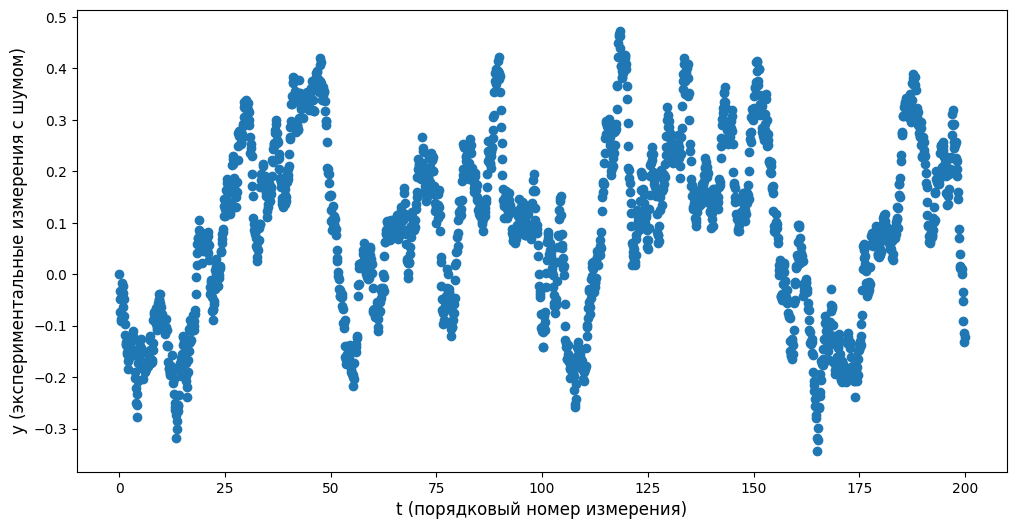

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(t, y, 'o')
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y (экспериментальные измерения с шумом)', fontsize=12)
plt.show()

In [ ]:
print("математическое ожидание = ", np.mean(y))
print("среднеквадратическое отклонение = " + "{:.3f}".format(np.std(y)))
print("среднеквадратическое отклонение = ", np.std(y))

математическое ожидание =  0.08805138460150894
среднеквадратическое отклонение = 0.168
среднеквадратическое отклонение =  0.1681267634667209


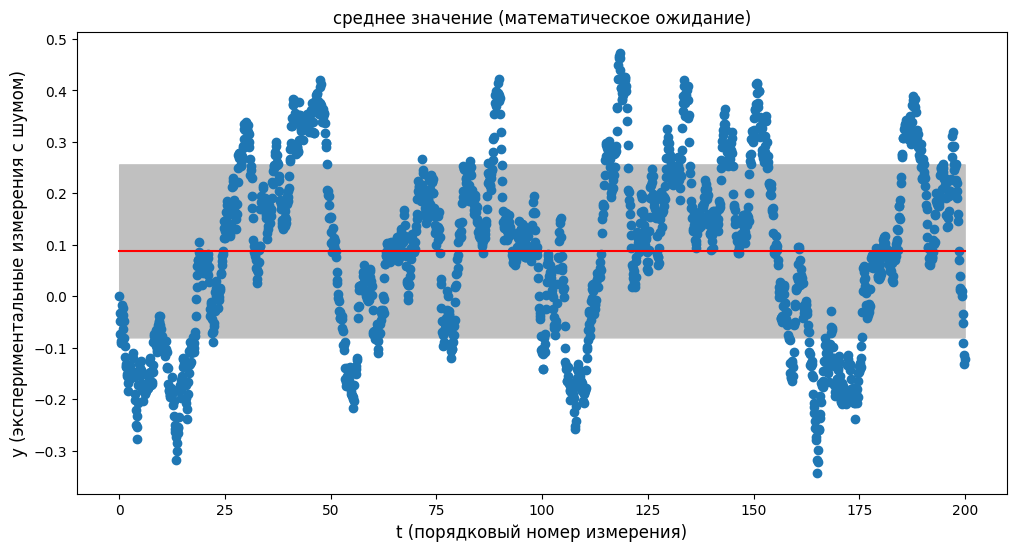

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(t, y, 'o')
plt.plot([t[0], t[-1]],[np.mean(y), np.mean(y)],color='red')
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y (экспериментальные измерения с шумом)', fontsize=12)
plt.title("среднее значение (математическое ожидание)")
plt.fill_between(t, np.mean(y) + np.std(y), np.mean(y) - np.std(y), color = "silver")
#plt.grid()
plt.show()

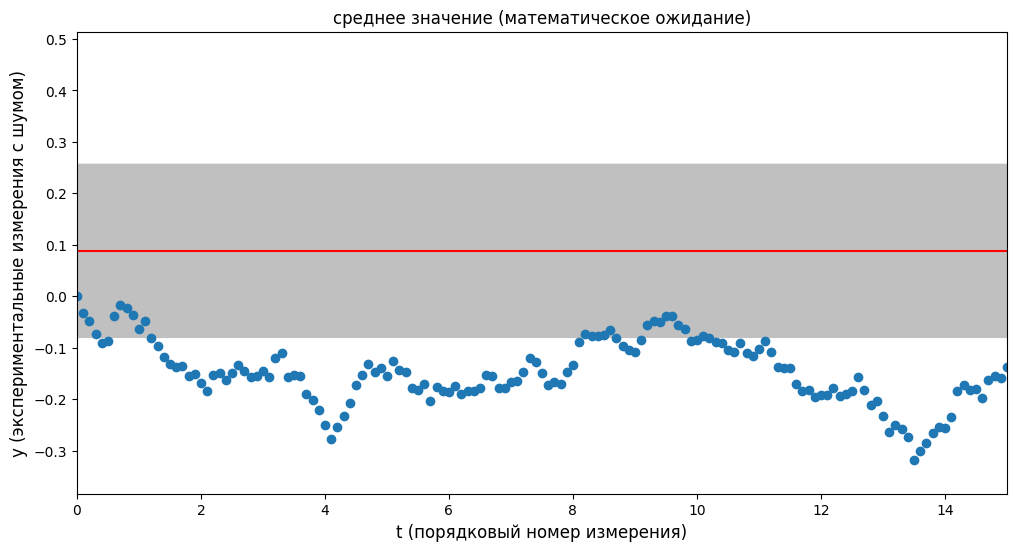

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o')
plt.plot([t[0], t[-1]], [np.mean(y), np.mean(y)], color='red')
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y (экспериментальные измерения с шумом)', fontsize=12)
plt.title("среднее значение (математическое ожидание)")
plt.fill_between(t, np.mean(y) + np.std(y), np.mean(y) - np.std(y), color="silver")
plt.xlim(0, 15)
plt.show()

In [ ]:
def autocorr(signal, time_period):
  y_acorr = len(time_period) * [0]
  mean = sum(signal)/len(time_period)
  var = sum([(y - mean)**2 for y in signal]) / len(time_period)
  y_norm = [y - mean for y in signal]
  idx = range(len(time_period))
  for l in idx:
      c = 1
      if (l>0):
        tmp = [y_norm[l:][i] * y_norm[:-l][i] for i in range(len(signal) - l)]
        c = sum(tmp) / len(signal) / var
      y_acorr[l] = c
  return y_acorr

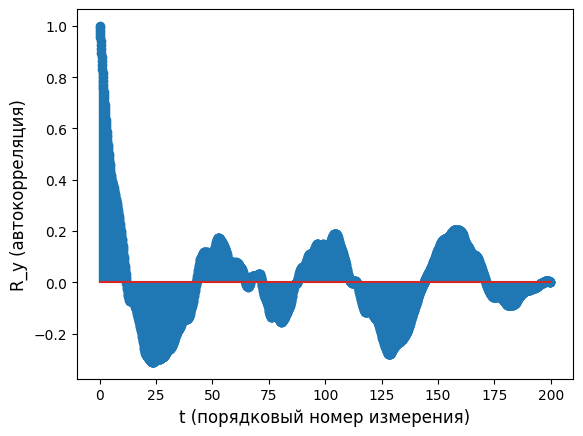

In [ ]:
y_acorr = autocorr(y,t)
plt.stem(t,y_acorr)
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('R_y (автокорреляция)', fontsize=12)
plt.show()

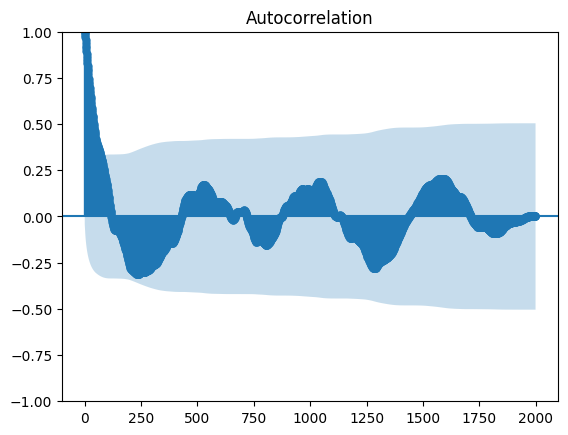

In [ ]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y, lags = len(y)-1, fft = True)
plt.show()

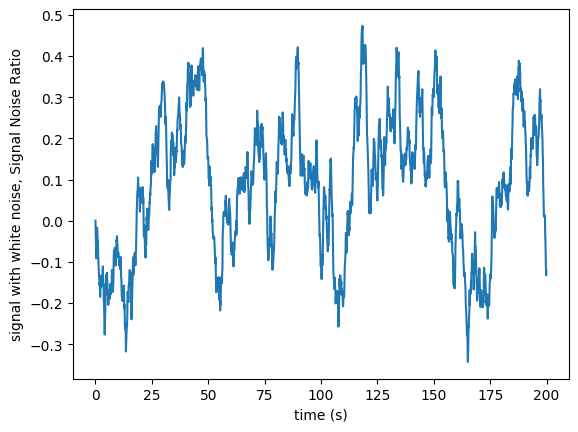

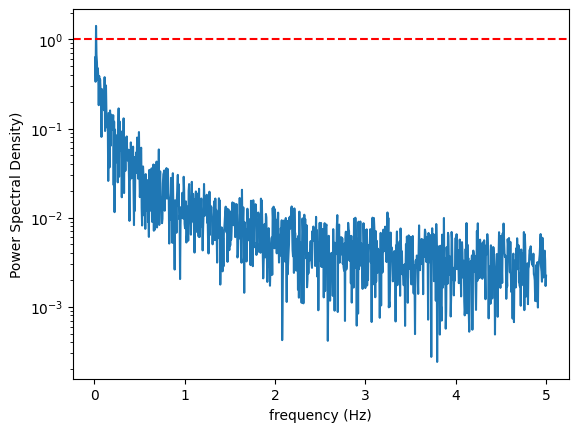

In [ ]:
f, psd = signal.periodogram(y, fs)
# plt.plot(t, signal_with_noise)
# plt.plot(t, signal_pure)
plt.plot(t,y)
plt.xlabel("time (s)")
plt.ylabel('signal with white noise, Signal Noise Ratio')
plt.show()

plt.semilogy(f[2:], np.sqrt(psd[2:]))
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectral Density)")
plt.axhline(1, ls="dashed", color="r")
plt.show()


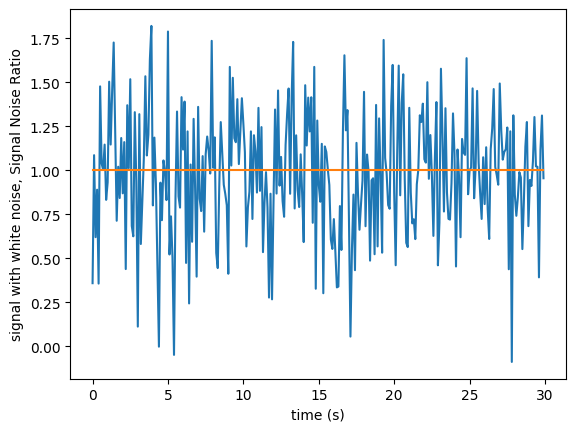

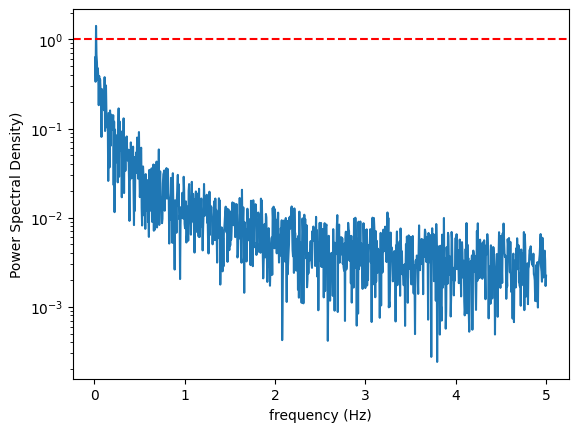

In [ ]:
f, psd = signal.periodogram(y, fs)
plt.plot(t[:300], signal_with_noise[:300])
plt.plot(t[:300], signal_pure[:300])
plt.xlabel("time (s)")
plt.ylabel('signal with white noise, Signal Noise Ratio')
plt.show()
plt.semilogy(f[2:], np.sqrt(psd[2:]))
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectral Density)")
plt.axhline(1, ls="dashed", color="r")
plt.show()

In [ ]:
mean_psd = np.mean(psd)
print("Спектральная плотность сигнала:", mean_psd)

Спектральная плотность сигнала: 0.005647674044714228


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


<ipython-input-512-58c42381ad41>:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  data_from_raw_edf.plot_psd(fmin=1, fmax=30, tmax=np.inf, show=False)
<ipython-input-512-58c42381ad41>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data_from_raw_edf.plot_psd(fmin=1, fmax=30, tmax=np.inf, show=False)


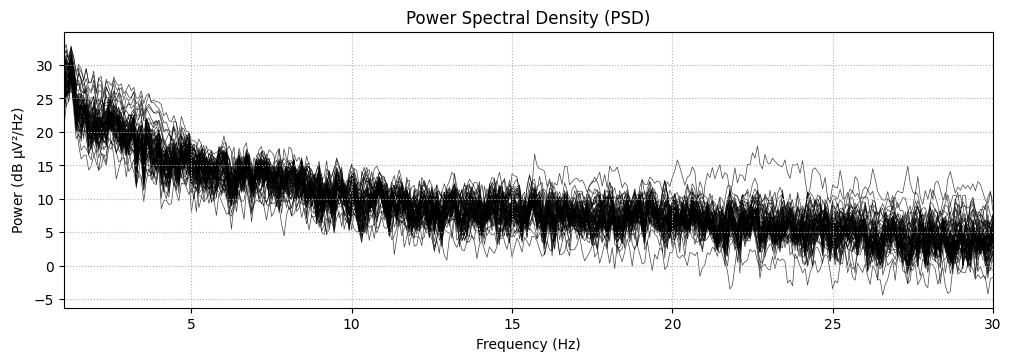

In [ ]:
data_from_raw_edf.plot_psd(fmin=1, fmax=30, tmax=np.inf, show=False)
plt.title('Power Spectral Density (PSD)')
plt.show()

# Обработка датафреймов

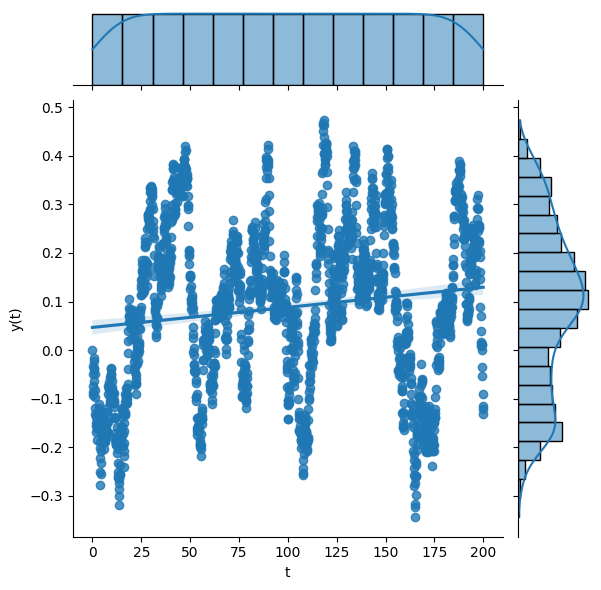

In [ ]:
d = {'y(t)': y, 't': t}
df = pd.DataFrame(d)
seaborn.jointplot(data=df, x = "t", y = "y(t)",kind='reg')

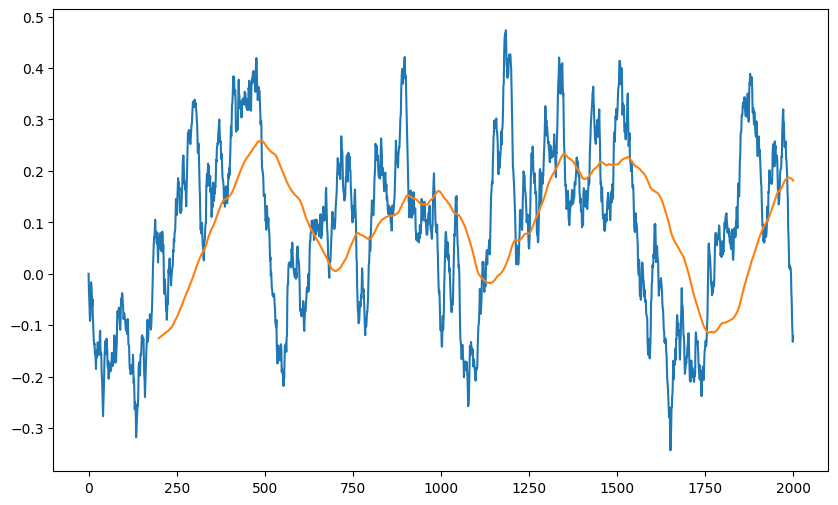

In [ ]:
df['y(t)'].plot(figsize=(10,6))
df['y(t)'].rolling(window = int(len(t)*0.1)).mean().plot()
y_mean = df['y(t)'].rolling(window = int(len(t)*0.1)).mean()


<ipython-input-515-0f5683c2a30d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = np.sin(t[i]) + noise[i]


Text(0, 0.5, 'y (экспериментальные измерения)')

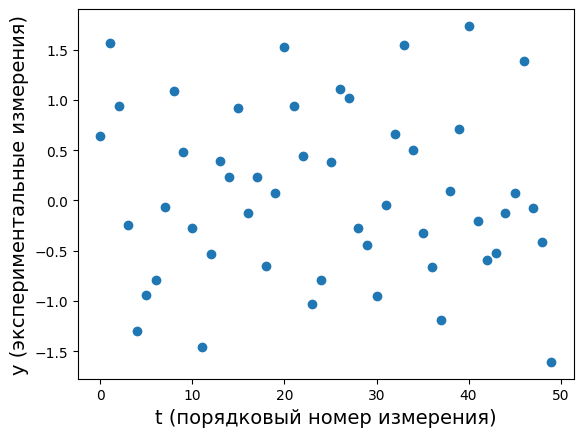

In [ ]:
def dataset_stohastic(mu, noise_sigma, data_size, random_state):
    t = np.arange(0, data_size, 1.)
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = np.sin(t[i]) + noise[i]

    return t, y

data_size = 50
noise_sigma = 0.5
mu = 0 # математическое ожидание
t, y = dataset_stohastic(mu, noise_sigma, data_size, 1)

plt.plot(t, y, 'o')
plt.xlabel('t (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (экспериментальные измерения)', fontsize=14)

<ipython-input-515-0f5683c2a30d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = np.sin(t[i]) + noise[i]


         t         y
0      0.0  0.470858
1      1.0  0.143182
2      2.0  0.569440
3      3.0  0.326372
4      4.0 -1.264977
...    ...       ...
1495  45.0  1.063230
1496  46.0  0.273412
1497  47.0  0.494722
1498  48.0 -1.912562
1499  49.0 -0.709930

[1500 rows x 2 columns]


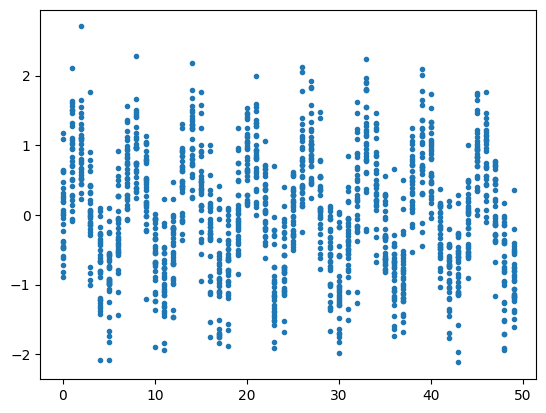

In [ ]:
x_cortege = []
y_cortege = []
for i in range(30):
     x_t, y_t = dataset_stohastic(mu, noise_sigma, data_size, i)
     x_cortege = np.append(x_cortege, x_t)
     y_cortege = np.append(y_cortege, y_t)
plt.plot(x_cortege,y_cortege,'.')
dataframe_cortege = {
    "t": x_cortege,
    "y": y_cortege
}
df = pd.DataFrame(dataframe_cortege)

print(df)

<Axes: xlabel='t', ylabel='y'>

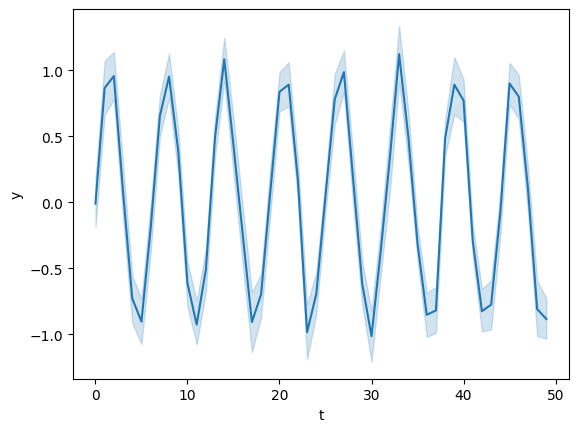

In [ ]:
seaborn.lineplot(x = "t", y= "y", data = df, markers = True)

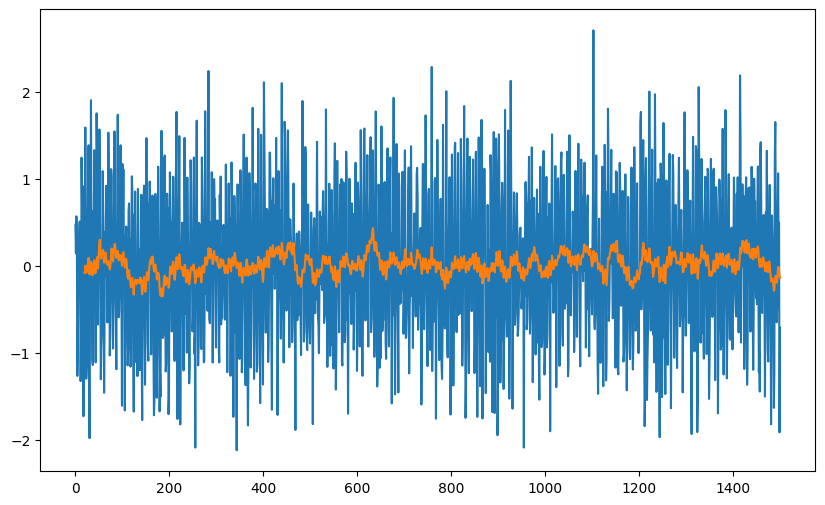

In [ ]:
df['y'].plot(figsize=(10,6))
df['y'].rolling(window = 20).mean().plot()
y_mean = df['y'].rolling(window = 20).mean()

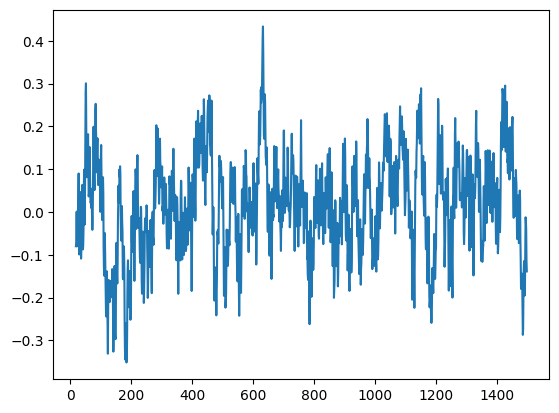

In [ ]:
plt.plot(y_mean)

# Экспонента Хёрста

In [ ]:
pip install hurst

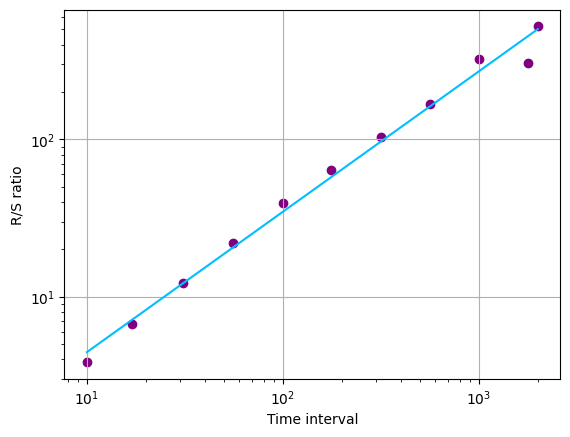

H=0.8922, c=0.5693


In [ ]:
from hurst import compute_Hc
H, c, data = compute_Hc(y, kind='change', simplified=False)

f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

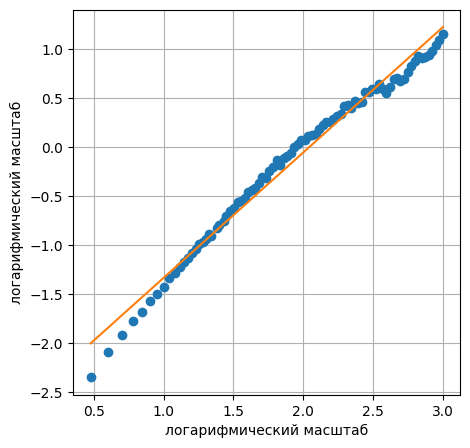

Estimated H = 1.278


In [ ]:
from MFDFA import MFDFA
lag = np.unique(np.logspace(0.5, 3, 100, dtype=int))
q = 2
order = 1
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)
del_nan = np.argwhere(np.isnan(dfa))
dfa = np.delete(dfa,del_nan[:,0])
lag = np.delete(lag,del_nan[:,0])
H_hat, C_hat = np.polyfit(np.log10(lag)[0:-1],np.log10(dfa[0:-1]),1)

plt.figure(figsize=(5, 5))
plt.plot(np.log10(lag),np.log10(dfa),"o")
tlin = np.linspace(np.log10(lag[0]),np.log10(lag[-1]), num=100)
plt.plot(tlin, H_hat*tlin + C_hat)
plt.xlabel("логарифмический масштаб")
plt.ylabel("логарифмический масштаб")
plt.grid()
plt.show()

print('Estimated H = '+'{:.3f}'.format(H_hat))

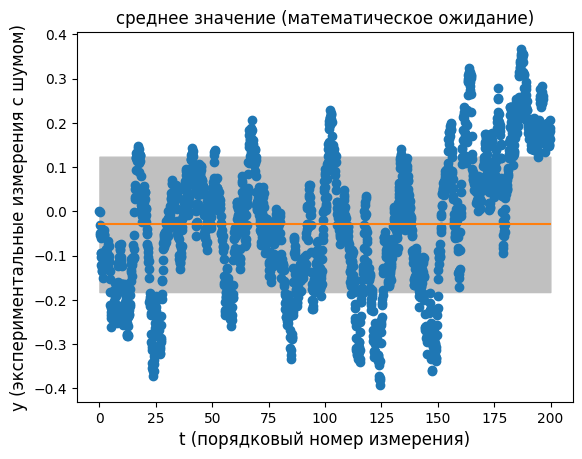

In [ ]:
plt.plot(t, y, 'o')
plt.plot([t[0], t[-1]],[np.mean(y), np.mean(y)])
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y (экспериментальные измерения с шумом)', fontsize=12)
plt.title("среднее значение (математическое ожидание)")
plt.fill_between(t, np.mean(y) + np.std(y), np.mean(y) - np.std(y), color = "silver")
plt.show()

Text(0, 0.5, 'Значения сигнала у')

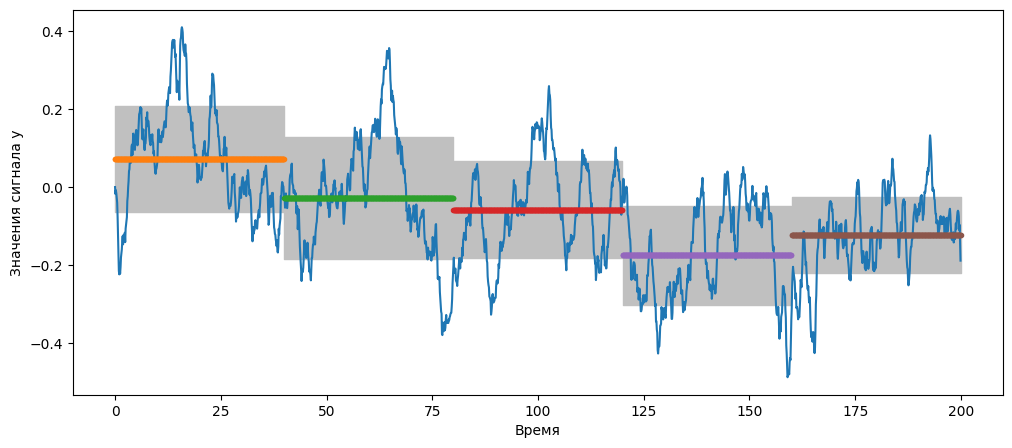

In [ ]:
window_count = 5
len_int = int(len(y)/window_count)

plt.figure(figsize = (12,5))
plt.plot(t,y)
for i in range(0,window_count):
  window_idx = range(0+i*len_int,(1+i)*len_int)
  y_window = np.mean(y[window_idx]) * np.ones(len_int)
  plt.plot(t[window_idx], y_window,".")
  plt.fill_between(t[window_idx], np.mean(y_window) + np.std(y[window_idx]), np.mean(y_window) - np.std(y[window_idx]), color = "silver")
plt.xlabel('Время')
plt.ylabel('Значения сигнала у')


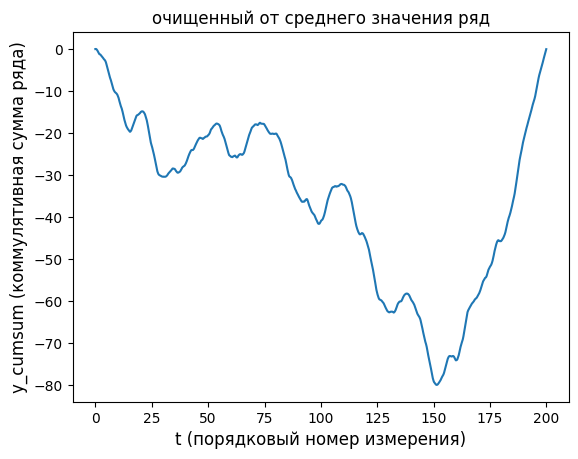

In [ ]:
y_cumsum = []
y_cumsum = np.array([y[0] - np.mean(y)])
for i in range(1,len(y)):
  y_cumsum = np.append(y_cumsum, y_cumsum[i-1] + y[i] - np.mean(y))

plt.plot(t, y_cumsum)
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y_cumsum (коммулятивная сумма ряда)', fontsize=12)
plt.title('очищенный от среднего значения ряд')
plt.show()

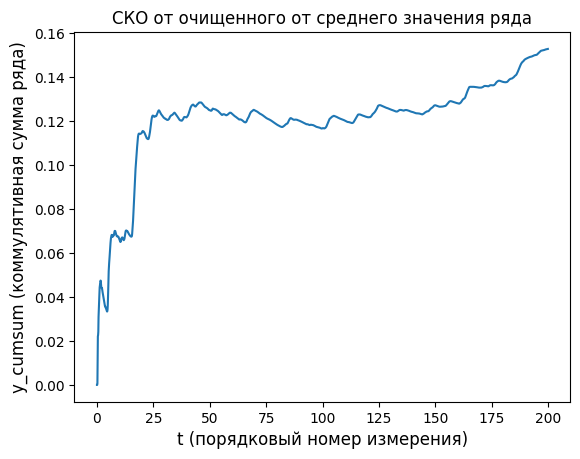

In [ ]:
y_std = []
y_std = np.array([np.std(y[0]-np.mean(y))])
for i in range(1,len(y)):
  y_std = np.append(y_std, np.std(y[range(0,i)]-np.mean(y)))


plt.plot(t, y_std)
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y_cumsum (коммулятивная сумма ряда)', fontsize=12)
plt.title('СКО от очищенного от среднего значения ряда')
plt.show()

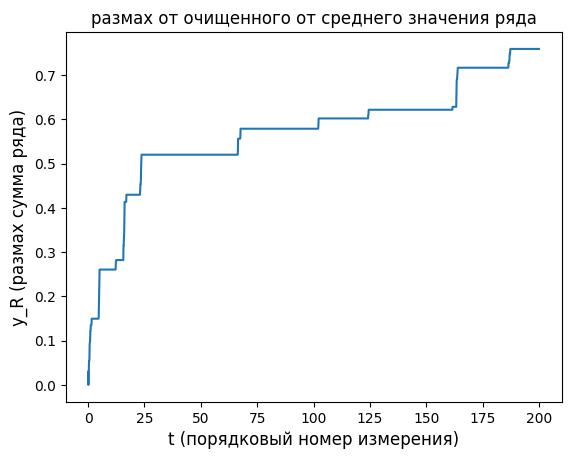

In [ ]:
y_R = []
y_R = np.array([(y[0]-np.mean(y))])
for i in range(1,len(y)):
  y_R= np.append(y_R, np.max(y[range(0,i)]) - np.min(y[range(0,i)]))


plt.plot(t, y_R)
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y_R (размах сумма ряда)', fontsize=12)
plt.title('размах от очищенного от среднего значения ряда')
plt.show()

<ipython-input-532-aef09d179bea>:1: RuntimeWarning: divide by zero encountered in divide
  RSstat = y_R / y_std
<ipython-input-532-aef09d179bea>:1: RuntimeWarning: invalid value encountered in divide
  RSstat = y_R / y_std


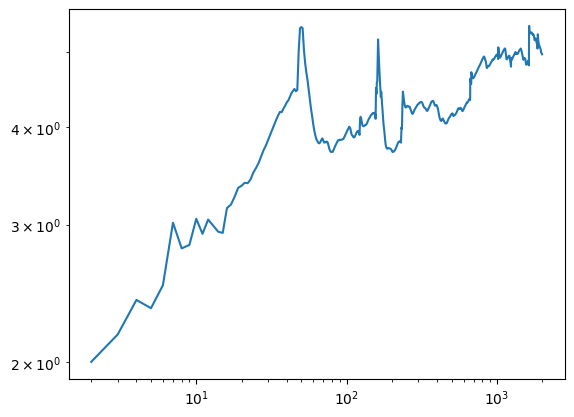

In [ ]:
RSstat = y_R / y_std
plt.loglog(RSstat)

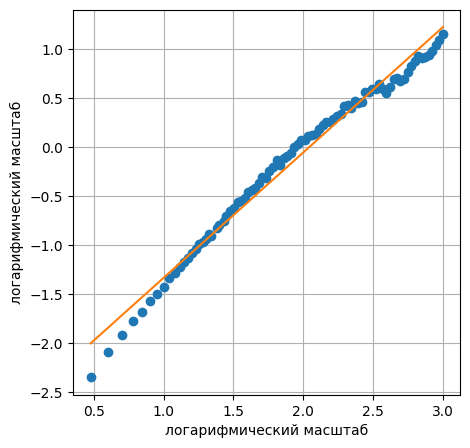

Estimated H = 1.278


In [ ]:
from MFDFA import MFDFA
lag = np.unique(np.logspace(0.5, 3, 100, dtype=int))
q = 2
order = 1
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)
del_nan = np.argwhere(np.isnan(dfa))
dfa = np.delete(dfa,del_nan[:,0])
lag = np.delete(lag,del_nan[:,0])
H_hat, C_hat = np.polyfit(np.log10(lag)[0:-1],np.log10(dfa[0:-1]),1)

plt.figure(figsize=(5, 5))
plt.plot(np.log10(lag),np.log10(dfa),"o")
tlin = np.linspace(np.log10(lag[0]),np.log10(lag[-1]), num=100)
plt.plot(tlin, H_hat*tlin + C_hat)
plt.xlabel("логарифмический масштаб")
plt.ylabel("логарифмический масштаб")
plt.grid()
plt.show()

print('Estimated H = '+'{:.3f}'.format(H_hat))

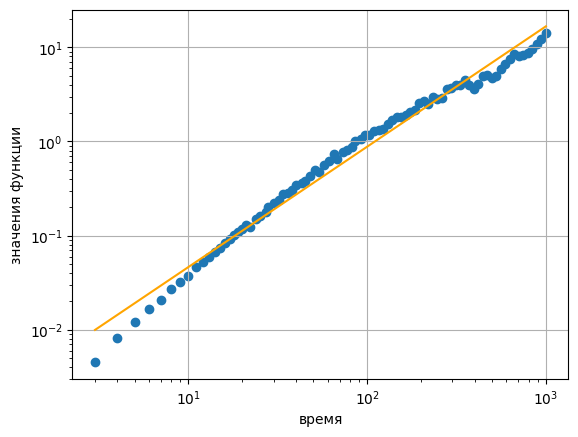

In [ ]:
plt.loglog(10**(tlin), 10**(H_hat*tlin + C_hat), color = "orange")
plt.scatter(lag,dfa)
plt.xlabel("время")
plt.ylabel("значения функции")
plt.grid()
plt.show()

#  Классификация k-ближайшего соседа

In [ ]:
# Функциональные ВХОДЫ Md-FKNNreg:
# xtrain: обучающие данные представляют собой m-мерную матрицу данных, состоящую из n шаблонов и m признаков (переменных)
# ytrain: n-мерный выходной вектор данных Xtrain
# xtest: Тестовые данные представляют собой матрицу данных D-by-m, состоящую из D шаблонов и m признаков
# ytest: D-мерный выходной вектор тестовых данных
# K: Количество ближайших соседей, которые будут выбраны
# p: значение параметра расстояния Минковского, p=2 относится к евклидову расстоянию

# Вычисление расстояния Минковского (при p=2  можем применить евклидово расстояние)
# --> используем p=2 для KNNreg, FKNNreg
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

def get_neighbors(xtrain, ytrain, test_sample, K, p):
	distances = list()
	for t in range(len(xtrain)):
		dist  = minkowski_distance(test_sample, xtrain[t], p)
		distances.append((ytrain[t], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(K):
		neighbors.append(distances[i])
	return neighbors

# вычисляем нечеткое членство для соседей
def get_memberships(neighbors):
    m = 2
    memberships = list()
    for neighbor in neighbors:
        if neighbor[1] == 0:
            memberships.append(0)
        else:
            memberships.append(neighbor[1]**(-1/(m-1)))
    return(memberships)

# вычисляем нечеткое средневзвешенное значение выходных данных ближайших соседей (т.е. прогнозирование)
def get_prediction(memberships, neighbors):
    train_y = list()
    for neighbor in neighbors:
        train_y.append(neighbor[0])
    products      = [a * b for a, b in zip(memberships, train_y)]
    predicted_val = sum(products)/sum(memberships)
    return predicted_val


# Функции для методов регрессии ближайшего соседа:

# Функция нечеткой регрессии k-ближайшего соседа на основе расстояния Минковского (Md-FKNNreg):
def Md_FKNNreg(xtrain, ytrain, xtest, K, p):
    yhat_mdfknn = list()
    for test_sample in xtest:
        mdfknn_neighbors  = get_neighbors(xtrain, ytrain, test_sample, K, p)
        mem_mdfknn        = get_memberships(mdfknn_neighbors)
        mdfknn_prediction = get_prediction(mem_mdfknn, mdfknn_neighbors)
        yhat_mdfknn.append(mdfknn_prediction)
    return yhat_mdfknn


# Функция нечеткой регрессии k-ближайшего соседа (FKNNreg):
def FKNNreg(xtrain, ytrain, xtest, K, p=2):
    yhat_fknn = list()
    for test_sample in xtest:
        fknn_neighbors   = get_neighbors(xtrain, ytrain, test_sample, K, p)
        fknn_memberships = get_memberships(fknn_neighbors)
        fknn_preidiction = get_prediction(fknn_memberships,fknn_neighbors)
        yhat_fknn.append(fknn_preidiction)
    return yhat_fknn


# Функция регрессии K-ближайшего соседа (KNNreg):
def KNNreg(xtrain, ytrain, xtest, K, p=2):
    yhat_knn = list()
    for test_sample in xtest:
        knn_neighbors      = get_neighbors(xtrain, ytrain, test_sample, K, p)
        knn_memberships    = np.ones(K)
        knn_preidiction    = get_prediction(knn_memberships,knn_neighbors)
        yhat_knn.append(knn_preidiction)
    return yhat_knn

Параметры:
1. Математическое ожидание (компонента 1)
2. Среднеквадратическое отклонение (компонента 2)
3. Автокорреляция (компонента 3)
4. Спектральная плотность сигнала (компонента 4)
5. Экспонента Херста (компонента 5)
7. Type (низкий(1), средний(2) и высокий(3) уровень внимания)


In [ ]:
# больше не запускать

import csv
import os

def remove_last_line(filename):

  with open(filename, 'r+') as f:
    lines = f.readlines()
    f.seek(0)
    f.truncate()
    f.writelines(lines[:-1])

filename = '/content/drive/MyDrive/EEG/csv_28_04 (1).csv'
remove_last_line(filename)



In [ ]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
url = '/content/drive/MyDrive/EEG/csv_28_04 (1).csv'

data = pd.read_csv(url, sep = ',')
sc_data = normalize(data)

X = sc_data[:, 0:-1]
y = sc_data[:, -1]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)

In [ ]:
data

Математическое ожидание  Среднеквадратическое отклонение  \
0                  0.060788                         0.142783   
1                  0.023577                         0.145504   
2                 -0.040627                         0.206766   
3                  0.013536                         0.161568   
4                  0.074313                         0.195159   
5                  0.031272                         0.155195   
6                  0.046839                         0.179481   
7                  0.044785                         0.159649   
8                  0.086563                         0.154120   
9                 -0.075982                         0.177323   
10                 0.034759                         0.144779   
11                -0.107445                         0.205446   
12                 0.091570                         0.169460   
13                -0.065402                         0.152753   
14                 0.010840                         0.168073   
15                -0.003877                         0.169667   
16                -0.056741                         0.182505   
17                -0.061182                         0.165045   
18                -0.016027                         0.181728   
19                -0.093603                         0.177133   
20                 0.003436                         0.159142   
21                 0.159321                         0.139086   
22                -0.004591                         0.201185   
23                 0.079100                         0.177443   
24                -0.083772                         0.144715   
25                -0.007050                         0.152852   
26                 0.007490                         0.180262   
27                -0.013222                         0.140886   
28                 0.020407                         0.156983   
29                -0.114982                         0.206835   
30                 0.033176                         0.204547   
31                 0.021270                         0.215549   
32                 0.005984                         0.173087   
33                 0.011568                         0.152732   
34                 0.069932                         0.163161   
35                -0.002920                         0.203223   
36                -0.003759                         0.152206   
37                -0.065696                         0.181105   
38                 0.129310                         0.134842   
39                 0.029646                         0.129648   

    Спектральная плотность  Экспонента Херста  Type  
0                 0.004073           0.911989     3  
1                 0.004230           0.864505     2  
2                 0.008542           0.887592     1  
3                 0.005216           0.923803     2  
4                 0.007610           0.935636     2  
5                 0.004812           0.924526     1  
6                 0.006436           0.916766     3  
7                 0.005092           0.868045     2  
8                 0.004746           0.887962     3  
9                 0.006282           0.941019     2  
10                0.004188           0.883862     1  
11                0.008433           0.928069     1  
12                0.005738           0.899264     3  
13                0.004662           0.860352     2  
14                0.005644           0.926949     2  
15                0.005752           0.910472     1  
16                0.006655           0.905349     2  
17                0.005443           0.881865     1  
18                0.006598           0.932375     2  
19                0.006269           0.892297     1  
20                0.005060           0.876708     1  
21                0.003865           0.902411     1  
22                0.008087           0.963299     3  
23                0.006291           0.957485     2  
24                0.004184   

<Axes: >

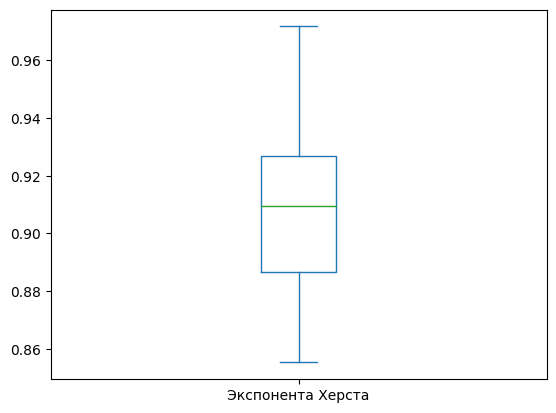

In [ ]:
data['Экспонента Херста'].plot(kind = 'box')

<Axes: >

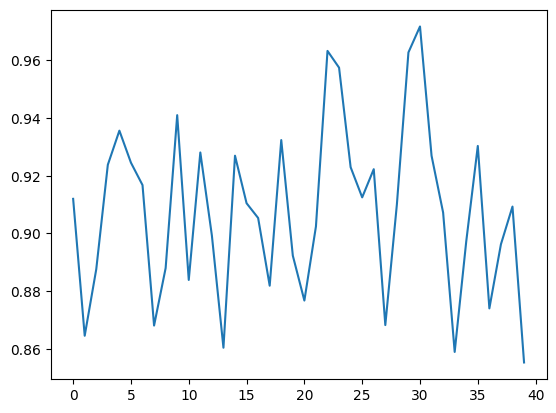

In [ ]:
data['Экспонента Херста'].plot()

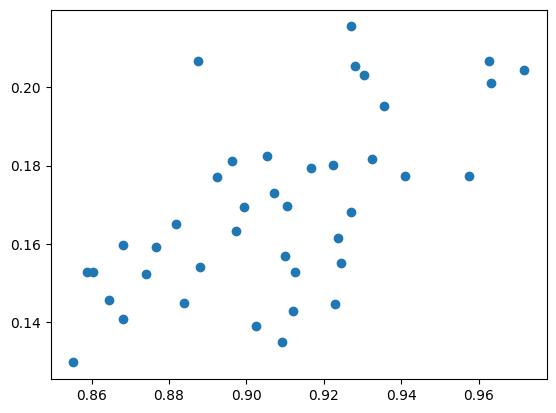

In [ ]:
plt.plot(data['Экспонента Херста'],data['Среднеквадратическое отклонение'],'o')

<Axes: >

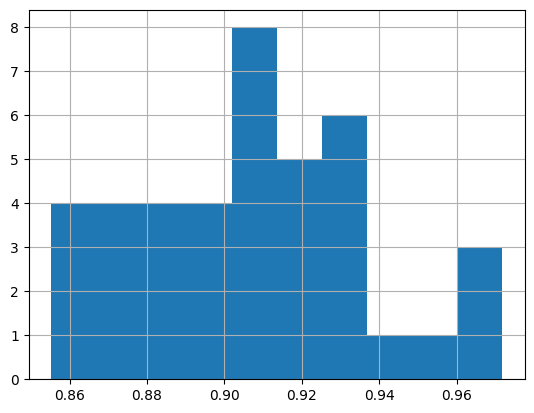

In [ ]:
data['Экспонента Херста'].hist(bins = 10)

In [ ]:
import seaborn as sns

In [ ]:
data.columns

Index(['Математическое ожидание', 'Среднеквадратическое отклонение',
       'Спектральная плотность', 'Экспонента Херста', 'Type'],
      dtype='object')

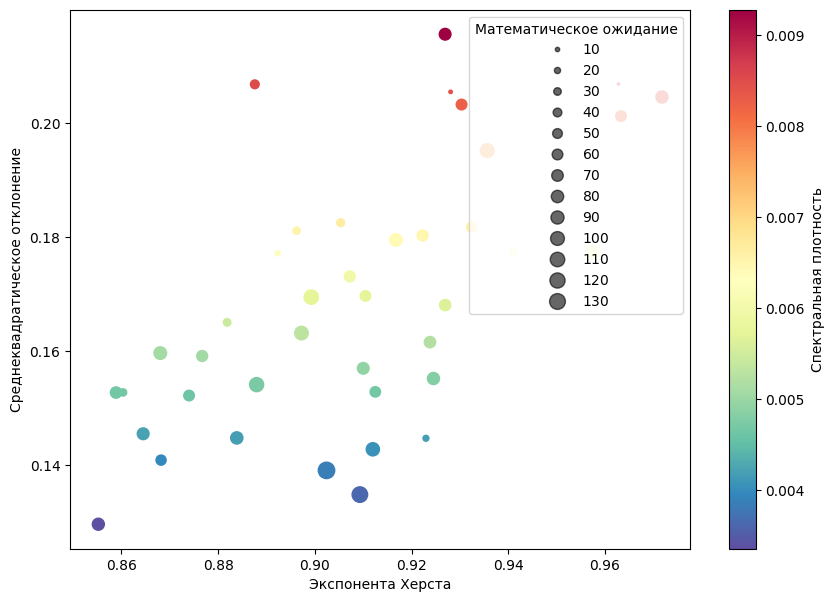

In [ ]:
cmap = sns.color_palette("Spectral", as_cmap=True).reversed()
f, ax = plt.subplots(figsize = (10,7))

Xaxis = data['Экспонента Херста']
Yaxis = data['Среднеквадратическое отклонение']
Color = data['Спектральная плотность']
Area = data['Математическое ожидание'] * 500+60

points = ax.scatter(Xaxis, Yaxis, Area, Color, cmap=cmap)
f.colorbar(points, label = data.columns[2])
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[1])

handles, labels = points.legend_elements(prop="sizes", alpha=0.6)
ax.legend(handles, labels, loc="upper right", title=data.columns[0])

plt.show()


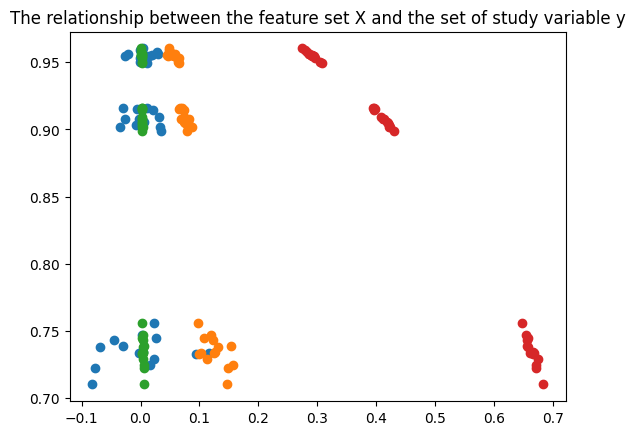

In [ ]:
plt.plot(X,y,'o')
# plt.xlabel('Признак X')
# plt.ylabel('Целевая переменная y')
plt.title("The relationship between the feature set X and the set of study variable y")

plt.show()

In [ ]:
K = 10 # определяем количество ближайших соседей

#Запускаем методы регрессии ближайших соседей для оценки моделей регрессии:

# Md-FKNNreg
p = 5 # можно запустить метод Md_FKNNreg для различных значений p
yhat_mdfknn = Md_FKNNreg(xtrain, ytrain, xtest, K, p)

# FKNNreg
yhat_fknn = FKNNreg(xtrain, ytrain, xtest, K)

# KNNreg
yhat_knn = KNNreg(xtrain, ytrain, xtest, K)


# Меры точности - Md-FKNNreg
mse_f1 = np.mean((ytest - yhat_mdfknn)**2)
rmse_f1 = np.sqrt(mse_f1)
r2_f1 = 1-(sum((ytest - yhat_mdfknn)**2)/sum((ytest-np.mean(ytest))**2))

# Меры точности - FKNNreg
mse_f2 = np.mean((ytest - yhat_fknn)**2)
rmse_f2 = np.sqrt(mse_f2)
r2_f2 = 1-(sum((ytest - yhat_fknn)**2)/sum((ytest-np.mean(ytest))**2))

# Меры точности - KNNreg
mse_f3 = np.mean((ytest - yhat_knn)**2)
rmse_f3 = np.sqrt(mse_f3)
r2_f3 = 1-(sum((ytest - yhat_knn)**2)/sum((ytest-np.mean(ytest))**2))

print("Md-FKNNreg Results:")
print("MSE:", mse_f1)
print("RMSE:", rmse_f1)
print("R-Squared:", r2_f1)
print(" ")

print("FKNNreg Results:")
print("MSE:", mse_f2)
print("RMSE:", rmse_f2)
print("R-Squared:", r2_f2)
print(" ")

print("KNNreg Results:")
print("MSE:", mse_f3)
print("RMSE:", rmse_f3)
print("R-Squared:", r2_f3)

# где
# MSE - среднеквадратичная ошибка
# RMSE - корень из среднеквадратичной ошибки
# R-Squared - коэффициент детерминации


Md-FKNNreg Results:
MSE: 1.90892030289357e-05
RMSE: 0.004369119250940137
R-Squared: 0.9965860924112135
 
FKNNreg Results:
MSE: 1.6457135087428472e-05
RMSE: 0.004056739465066554
R-Squared: 0.997056810686151
 
KNNreg Results:
MSE: 5.717378213810086e-05
RMSE: 0.007561334679677977
R-Squared: 0.9897750572182075


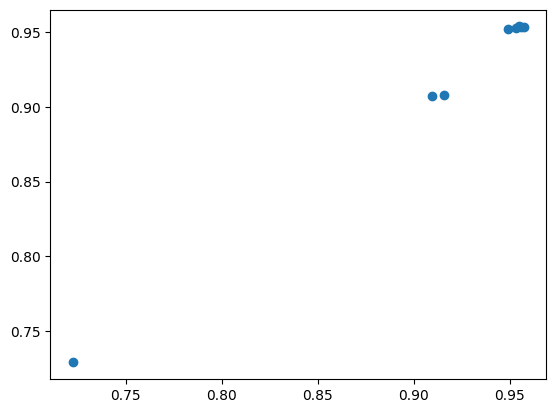

In [ ]:
plt.plot(ytest, yhat_fknn, 'o')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap

In [ ]:
data.columns

Index(['Математическое ожидание', 'Среднеквадратическое отклонение',
       'Спектральная плотность', 'Экспонента Херста', 'Type'],
      dtype='object')

In [ ]:
XX = [data['Экспонента Херста'], data['Среднеквадратическое отклонение']]


YY = data['Type']

X = np.transpose(np.array(list(XX)))
y = np.transpose(np.array(list(YY)))

In [ ]:
k = 3

knn = neighbors.KNeighborsClassifier(k, metric='euclidean')
knn.fit(X, y)

# В результате обучения модель будет способна классифицировать новые наблюдения на основе их признаков, опираясь на информацию
# о ближайших соседях, используя евклидово расстояние для определения расстояния между точками в пространстве признаков.

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
h = 0.005

cmap_light = ListedColormap(['orange', 'cyan', 'green'])

cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

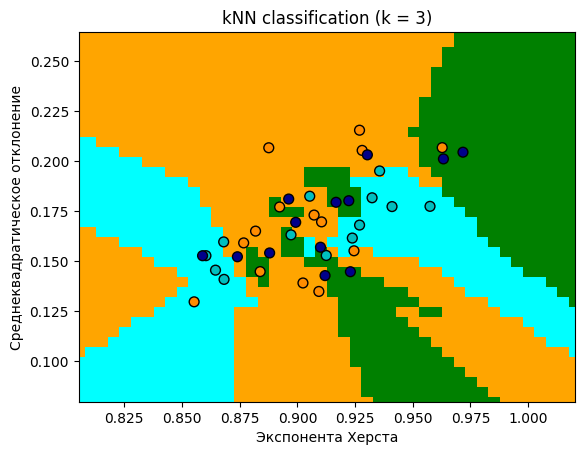

In [ ]:


plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(data.columns[3])
plt.ylabel(data.columns[1])
plt.title("kNN classification (k = %i)" % k)
plt.show()

In [ ]:
# не запускать

import pandas as pd

df_test_data = pd.read_csv('/content/drive/MyDrive/EEG/test_data.csv'  )

df_test_data = df_test_data.drop('Математическое ожидание', axis=1, errors='ignore')

csv_file_path = "/content/drive/MyDrive/EEG/test_data.csv"
df_test_data.to_csv(csv_file_path, index=False)

print("Столбец успешно удален из файла test_data.csv.")

Столбец успешно удален из файла test_data.csv.


In [ ]:

test_data_url = '/content/drive/MyDrive/EEG/test_data.csv'
test_data = pd.read_csv(test_data_url, sep=',')
sc_test_data = normalize(test_data)


X_test = sc_test_data

In [ ]:
test_data

Математическое ожидание  Среднеквадратическое отклонение  \
0                -0.125346                         0.187502   
1                 0.030565                         0.188744   
2                 0.100535                         0.157044   
3                -0.016219                         0.174262   
4                -0.055603                         0.171332   
5                 0.090904                         0.161691   
6                 0.045847                         0.161069   
7                -0.057127                         0.179424   
8                 0.018007                         0.204932   
9                -0.037526                         0.143964   

   Спектральная плотность  Экспонента Херста  
0                0.007024           0.917324  
1                0.007118           0.943114  
2                0.004928           0.889085  
3                0.006067           0.921189  
4                0.005865           0.920038  
5                0.005224           0.914443  
6                0.005183           0.793638  
7                0.006432           0.976027  
8                0.008391           0.943347  
9                0.004141           0.780975

In [ ]:
XX_t = [test_data['Экспонента Херста'], test_data['Среднеквадратическое отклонение']]

X_test = np.transpose(np.array(list(XX_t)))


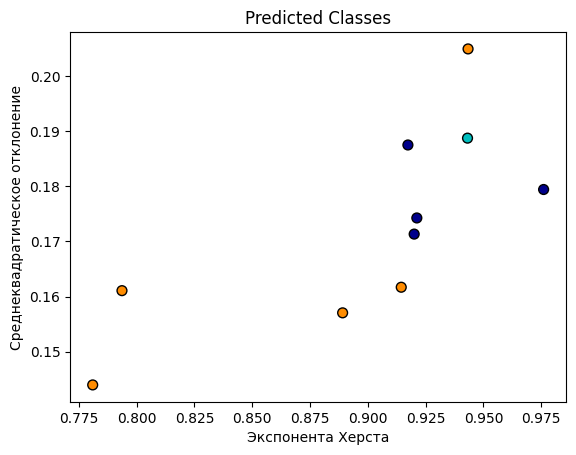

In [ ]:
predicted_classes = knn.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[1])
plt.title("Predicted Classes")
plt.show()


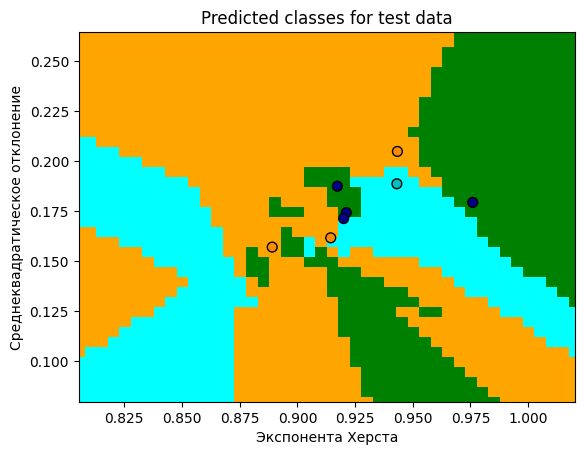

In [ ]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap=cmap_bold, edgecolor='k', s=50)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(data.columns[3])
plt.ylabel(data.columns[1])
plt.title("Predicted classes for test data")
plt.show()


In [ ]:
# Реализация KNN для обнаружения выбросов с помощью Scikit-Learn

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X)

distances, indexes = nbrs.kneighbors(X)

In [ ]:
distances[:3], distances.shape

(array([[0.        , 0.00838072, 0.01008223],
        [0.        , 0.00591797, 0.00835401],
        [0.        , 0.02707667, 0.03000412]]),
 (40, 3))

In [ ]:
indexes[:3], indexes[:3].shape

(array([[ 0, 38, 25],
        [ 1, 27, 13],
        [ 2, 37, 19]]),
 (3, 3))

Text(0, 0.5, 'Mean Distances')

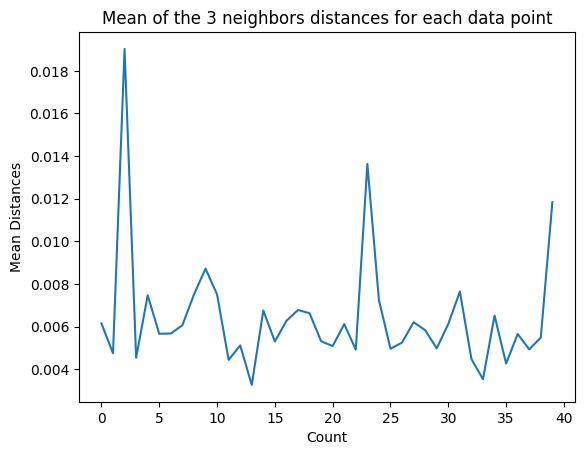

In [ ]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 3 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

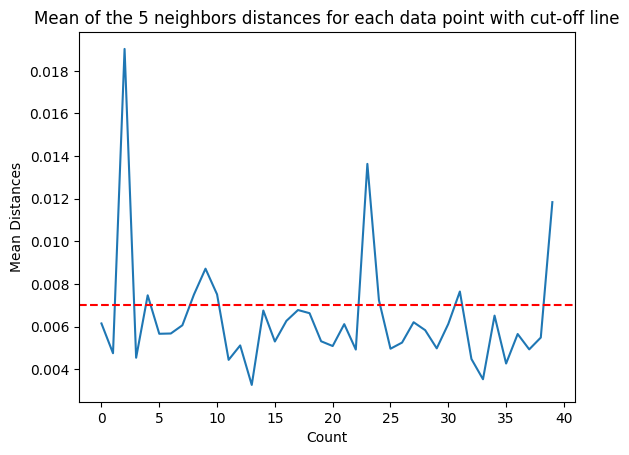

In [ ]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 3 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 0.007, color = 'r', linestyle = '--')

In [ ]:
import numpy as np

# Visually determine cutoff values > 0.007
outlier_index = np.where(dist_means > 0.007)
outlier_index

(array([ 2,  4,  8,  9, 10, 23, 24, 31, 39]),)

In [ ]:
# Filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values

Математическое ожидание  Среднеквадратическое отклонение  \
2                 -0.040627                         0.206766   
4                  0.074313                         0.195159   
8                  0.086563                         0.154120   
9                 -0.075982                         0.177323   
10                 0.034759                         0.144779   
23                 0.079100                         0.177443   
24                -0.083772                         0.144715   
31                 0.021270                         0.215549   
39                 0.029646                         0.129648   

    Спектральная плотность  Экспонента Херста  Type  
2                 0.008542           0.887592     1  
4                 0.007610           0.935636     2  
8                 0.004746           0.887962     3  
9                 0.006282           0.941019     2  
10                0.004188           0.883862     1  
23                0.006291           0.957485     2  
24                0.004184           0.922968     3  
31                0.009283           0.926935     1  
39                0.003358           0.855236     1

In [ ]:
#оценка классификации

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

url = '/content/drive/MyDrive/EEG/csv_28_04 (1).csv'
data = pd.read_csv(url, sep=',')
sc_data = normalize(data)

X = sc_data[:, 0:-1]
y = sc_data[:, -1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Type'])


In [ ]:
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc =  classifier.score(X_test, y_test)
print(acc)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

k = 3
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(xtrain, ytrain)

predicted_classes = knn.predict(xtest)

In [ ]:
acc =  knn.score(xtest, ytest)
print(acc)

1.0


In [ ]:
x_min, x_max = xtest[:, 0].min() - 0.1, xtest[:, 0].max() + 0.1
y_min, y_max = xtest[:, 1].min() - 0.1, xtest[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [ ]:
print(np.unique(ytest))

num_classes = len(np.unique(ytest))
cmap_bold = plt.cm.get_cmap('Set1', num_classes)


[1 2]


<ipython-input-72-89b4a0f93163>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_bold = plt.cm.get_cmap('Set1', num_classes)


In [ ]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(xtest[:, 0], xtest[:, 1], c=ytest, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Predicted classes for test data")
plt.show()


ValueError: cannot reshape array of size 1672 into shape (49,53)